# Progress: (NOT DONE)

# Table of contents
- [Data Analysis](#Data-Analysis)
- [Reading dataset](#Reading-dataset)
- [EDA 📉](#-EDA-📉)

## Skip to here for building model 👇
- [Preprocessing](#Preprocessing)
    - [Drop outliers](#Drop-outliers)
    - [Feature Scaling - StandardScaler](#Feature-Scaling---StandardScaler)
- [Split into Training and Testing data](#Split-into-Training-and-Testing-data)
- [Model Formulation](#Model-Formulation)
- [Export to csv (will be removed)](#Export-to-csv-(will-be-removed))
- [Model Evaluation](#Model-Evaluation)

[Test - Dropping unwanted features](#Test---Dropping-unwanted-features)

## About the Data set
    This dataset gives the information realated to heart disease. Dataset contain 13 columns, target is the class variable which is affected by other 12 columns. Here the aim is to classify the target variable to (disease\non disease) using different machine learning algorithm and findout which algorithm suitable for this dataset.

    **Attribute Information**

    Age (age in years)
    Sex (1 = male; 0 = female)
    CP (chest pain type)
    TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
    CHOL (serum cholestoral in mg/dl)
    FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    RESTECH (resting electrocardiographic results)
    THALACH (maximum heart rate achieved)
    EXANG (exercise induced angina (1 = yes; 0 = no))
    OLDPEAK (ST depression induced by exercise relative to rest)
    SLOPE (the slope of the peak exercise ST segment)
    CA (number of major vessels (0-3) colored by flourosopy)
    THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
    TARGET (1 or 0)

# Data Analysis

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. | Importing Libraries 📚</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Importing libraries</b> that will be used in this notebook.
</div>


In [28]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline
import seaborn as sns
import warnings

#EDA
from collections import Counter
import pandas_profiling as pp

# data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ensembling
from mlxtend.classifier import StackingCVClassifier

# settings
warnings.filterwarnings('ignore')


# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">3. | Color Palettes 🎨</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will create some <b>color palettes</b> that will be used in this notebook.
</div>

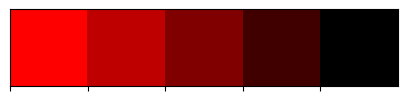

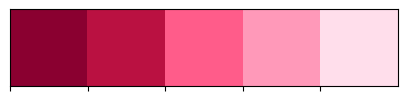

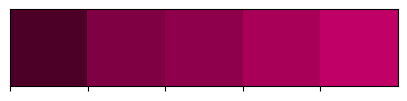

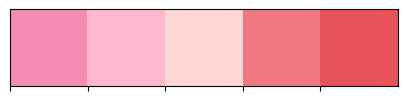

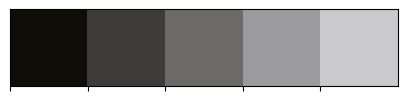

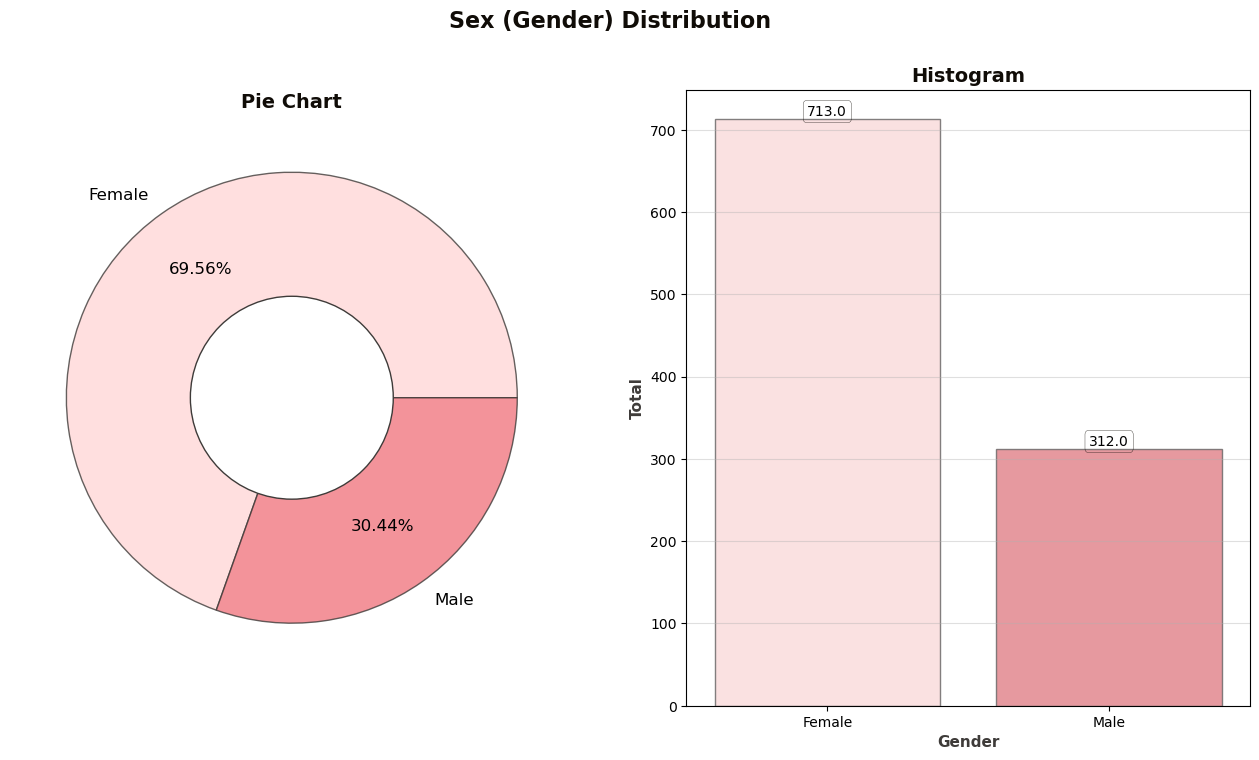

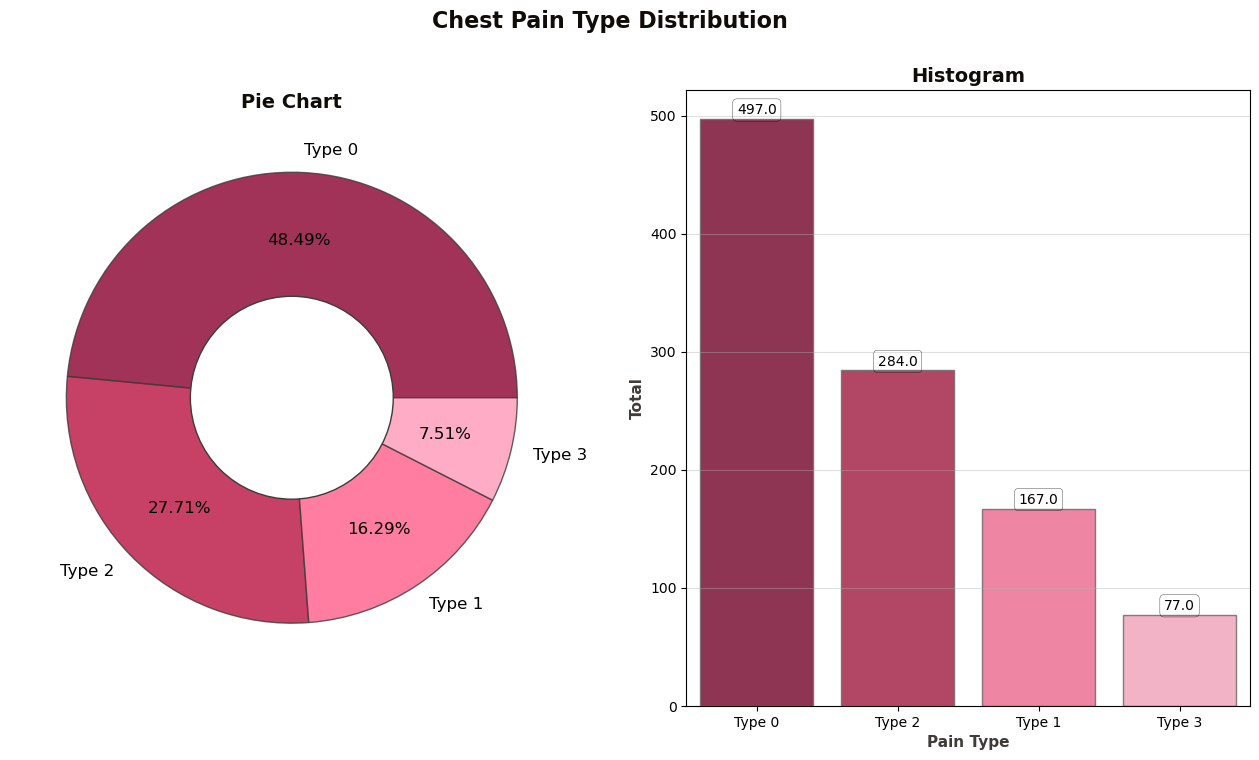

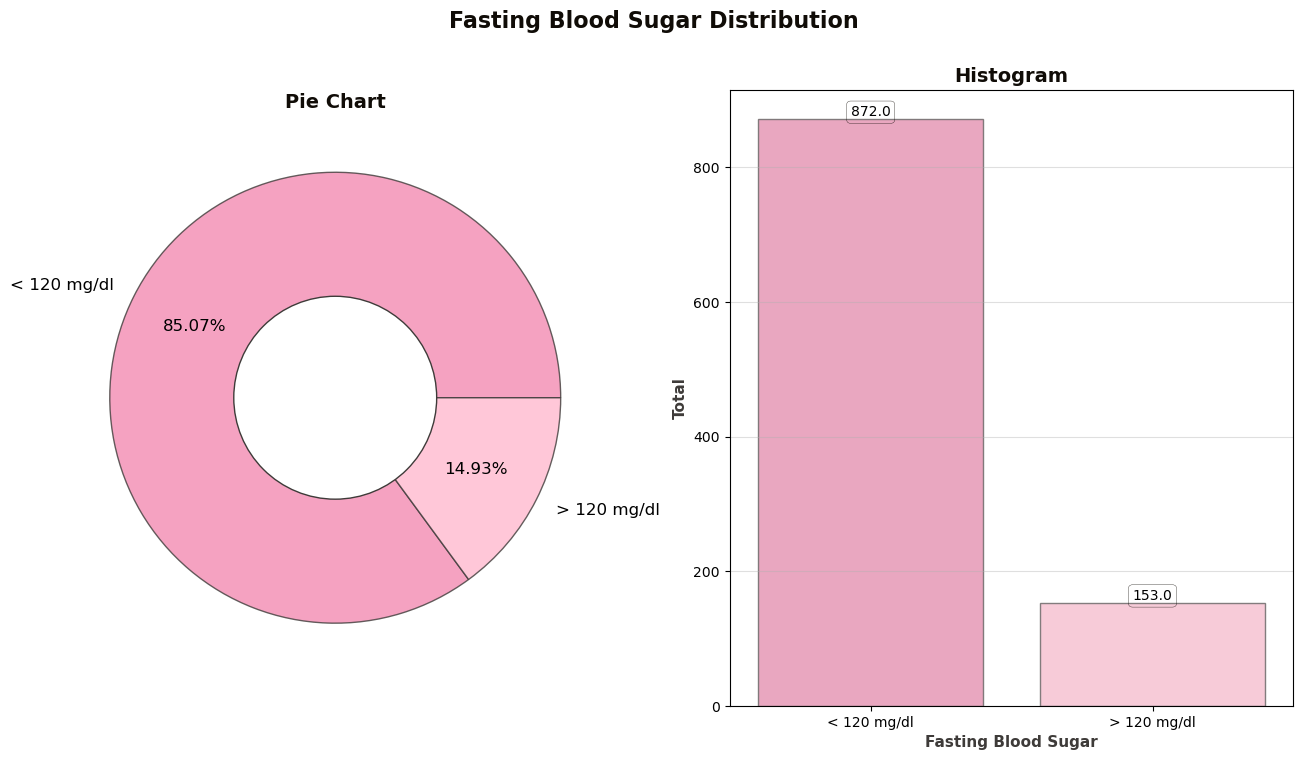

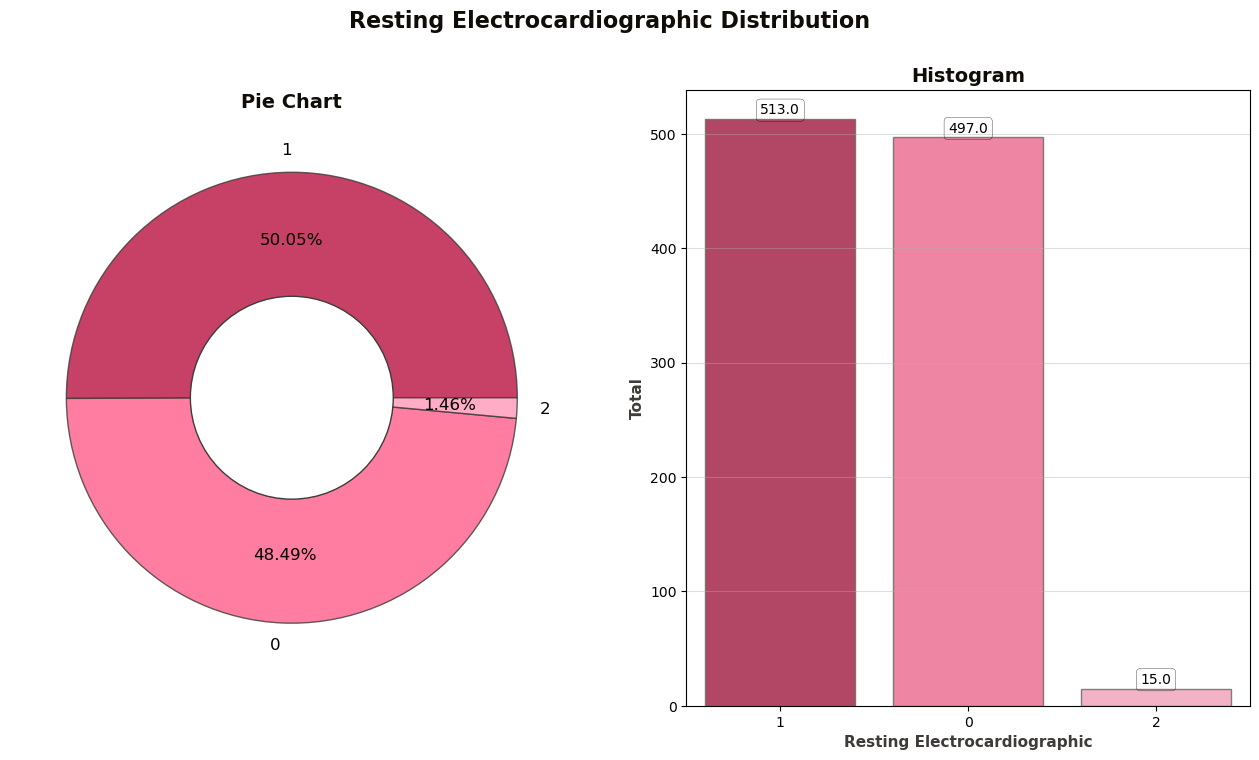

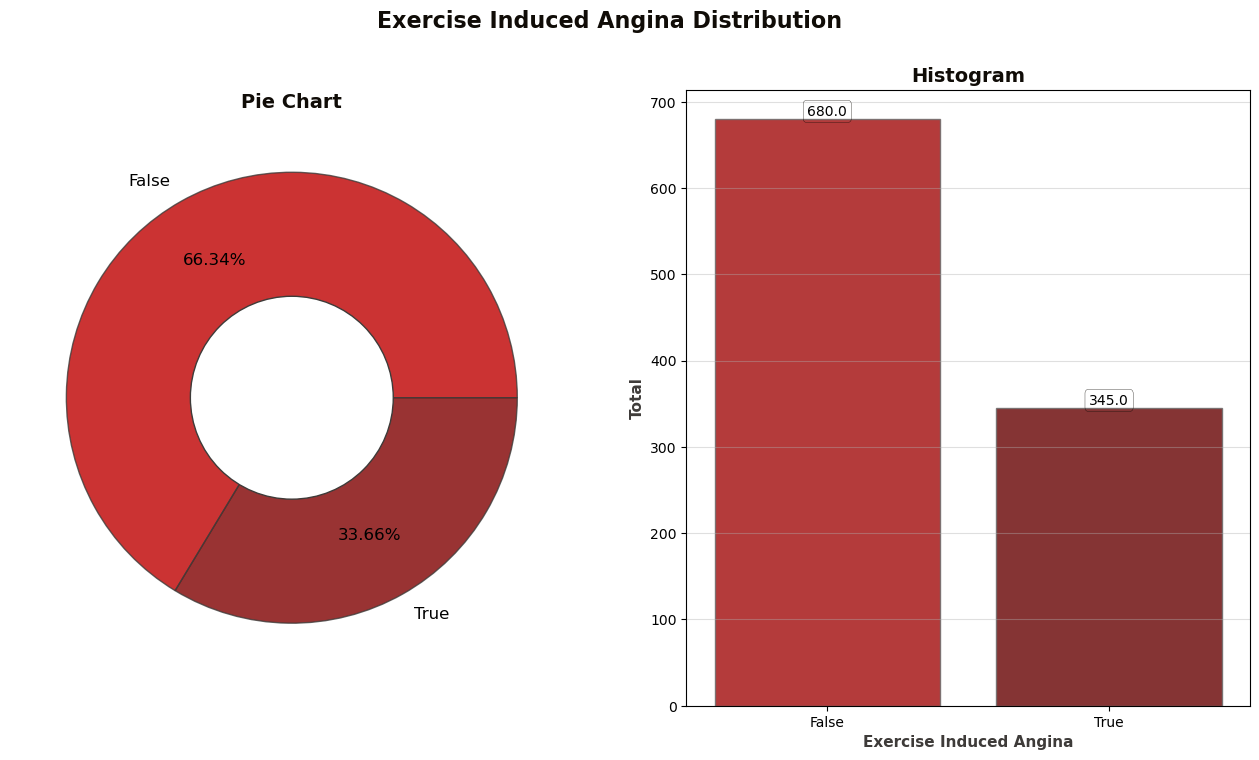

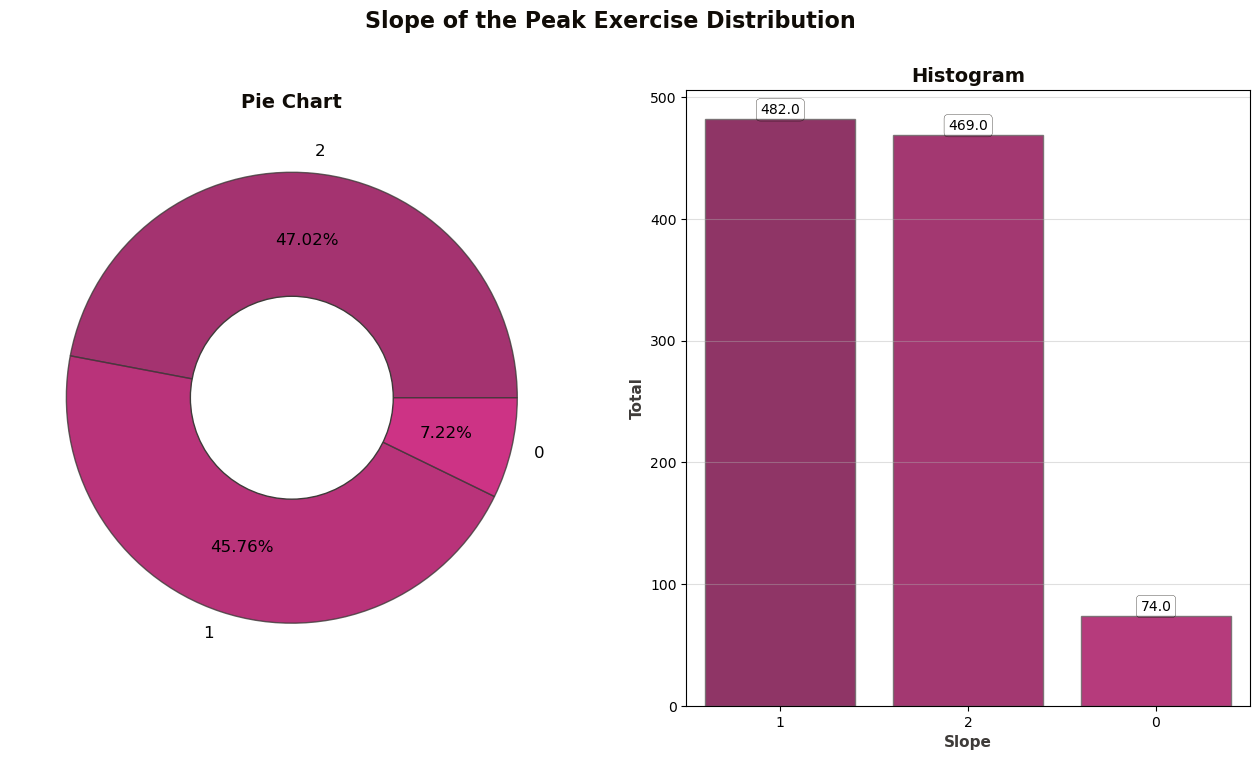

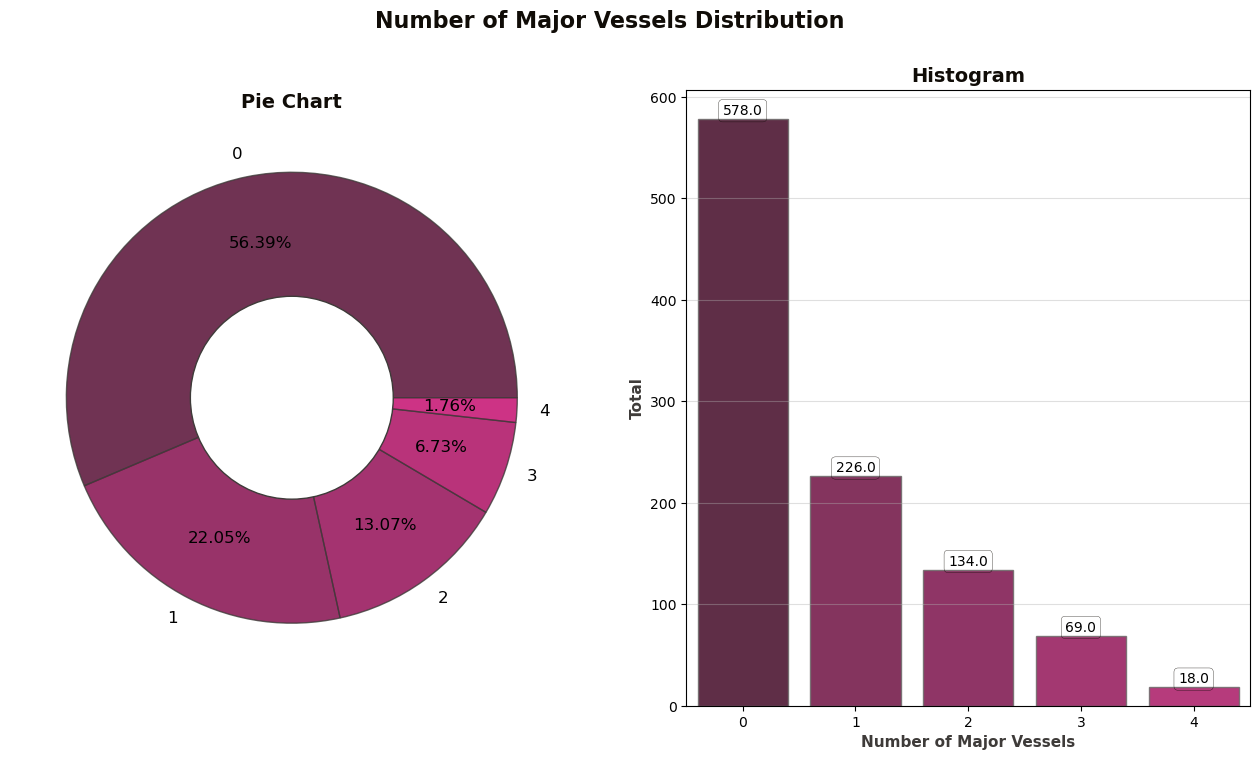

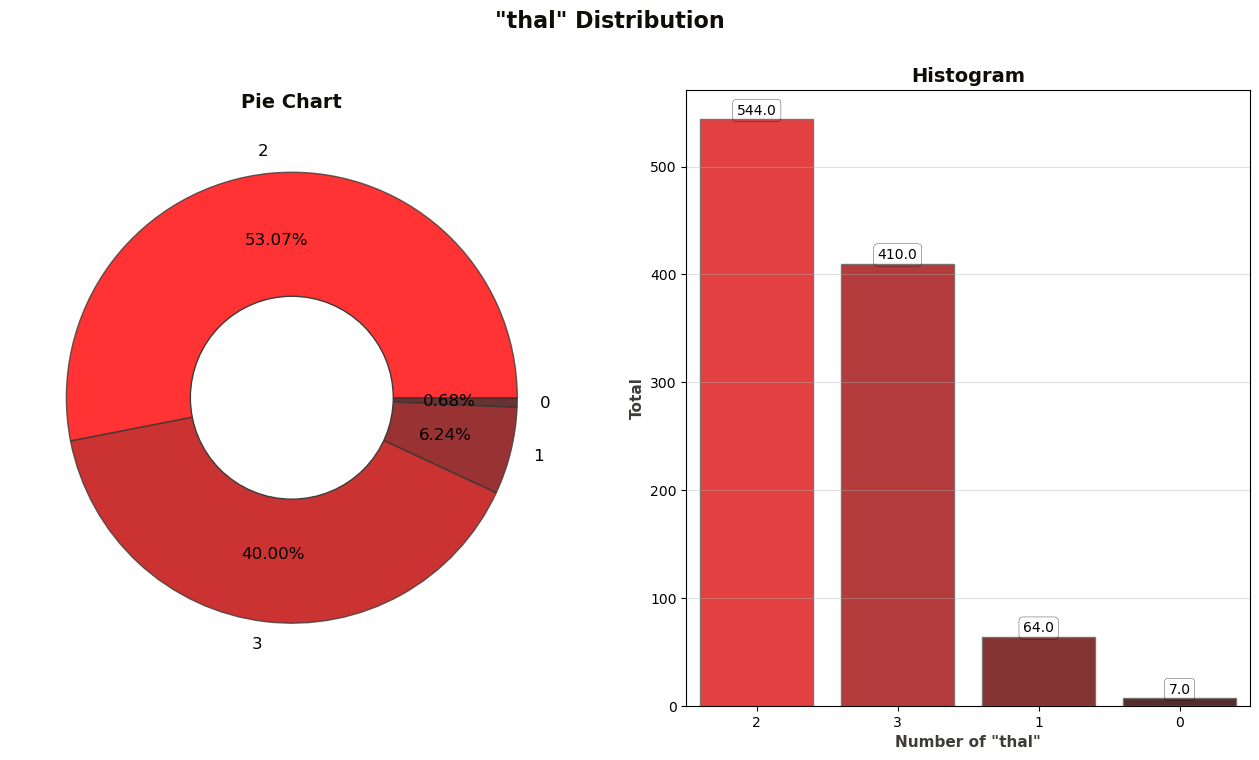

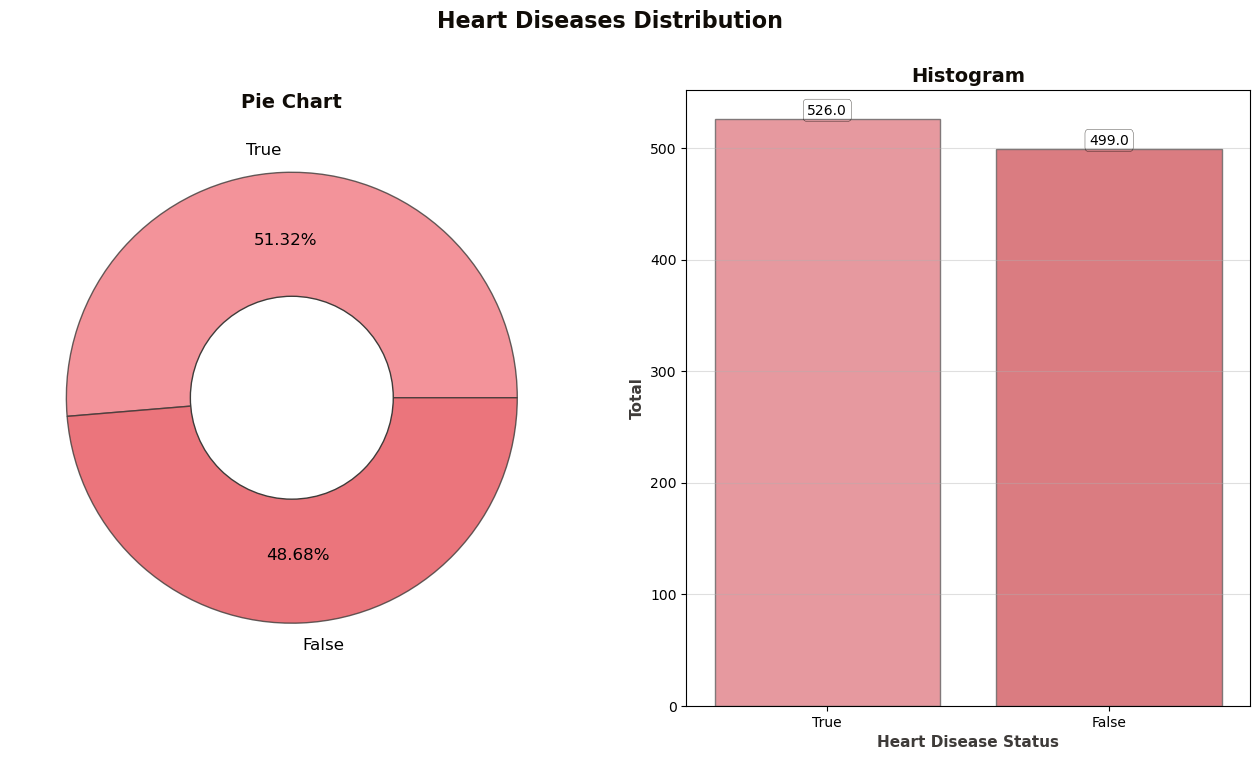

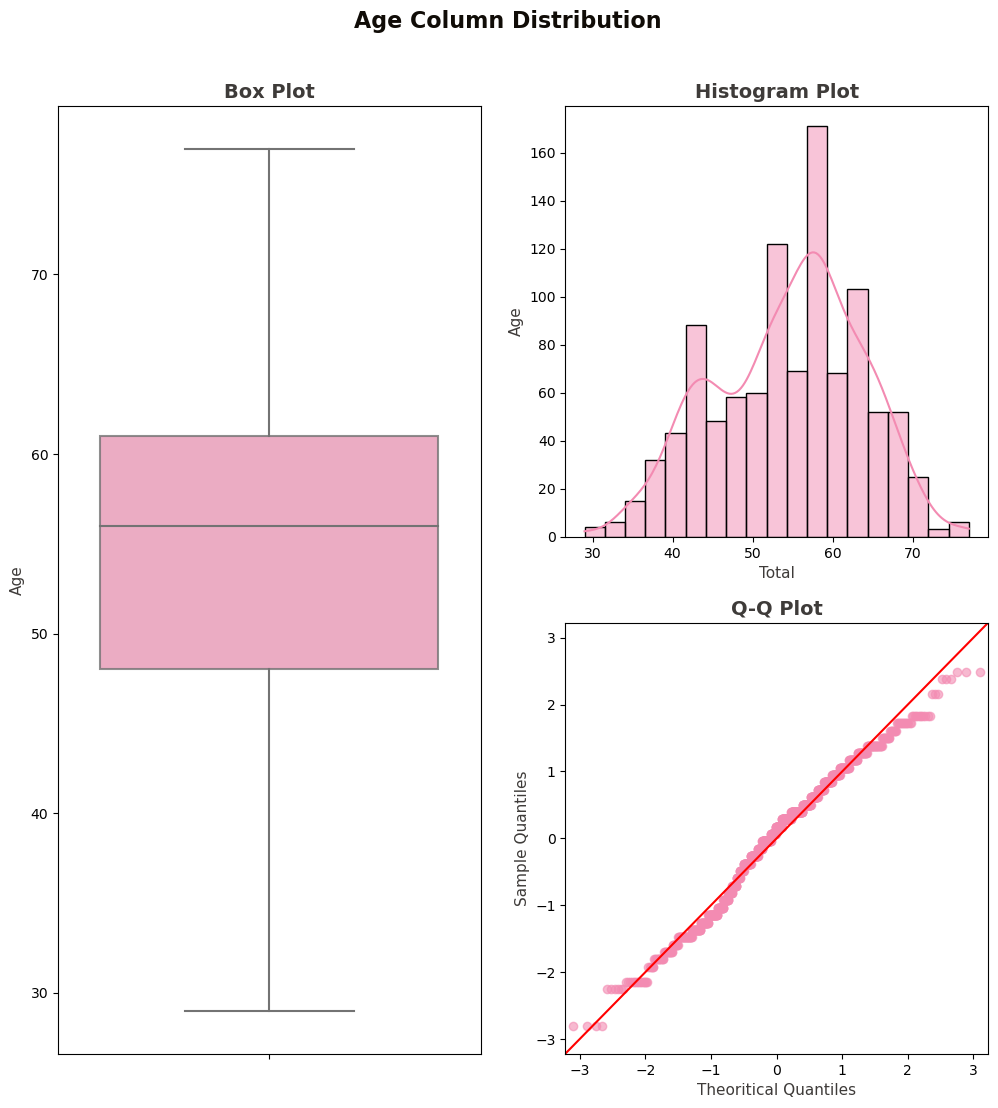

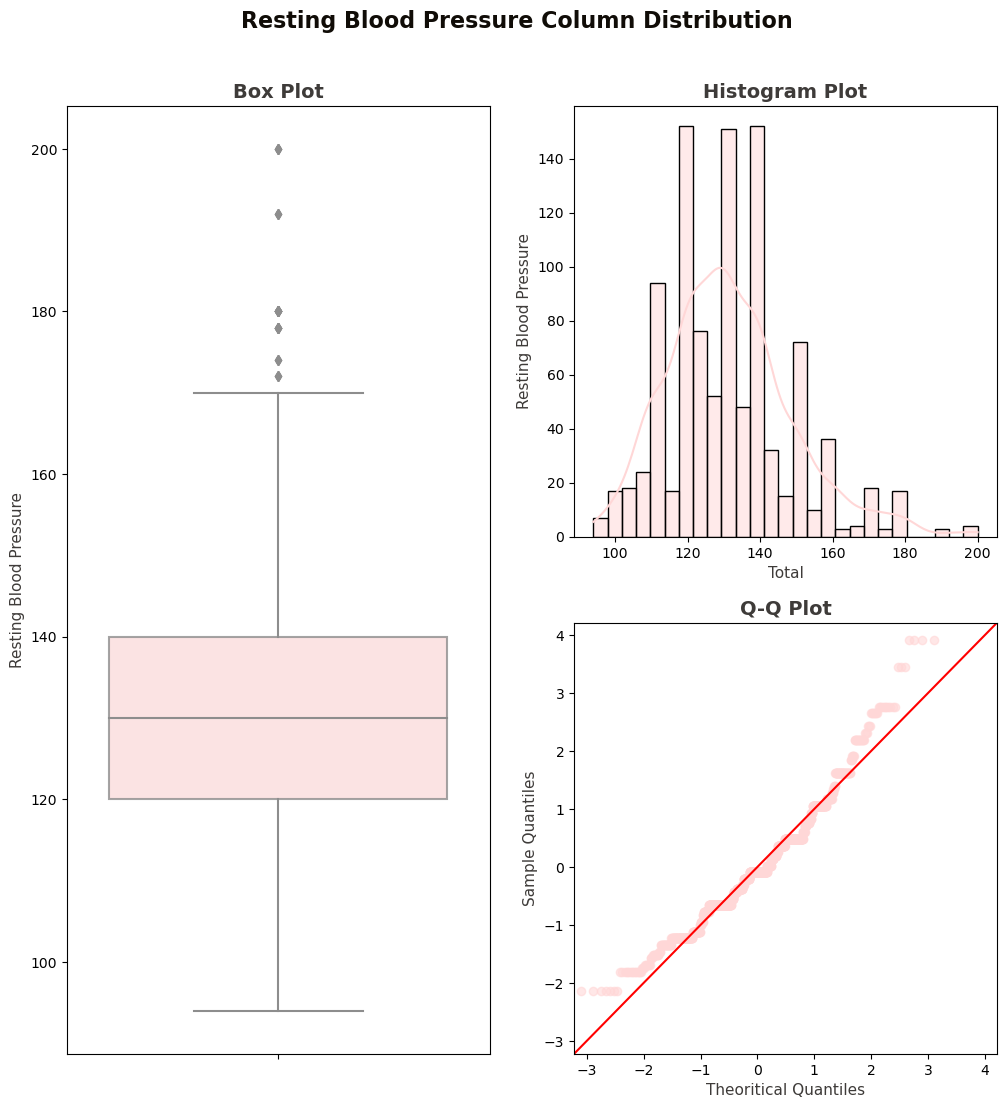

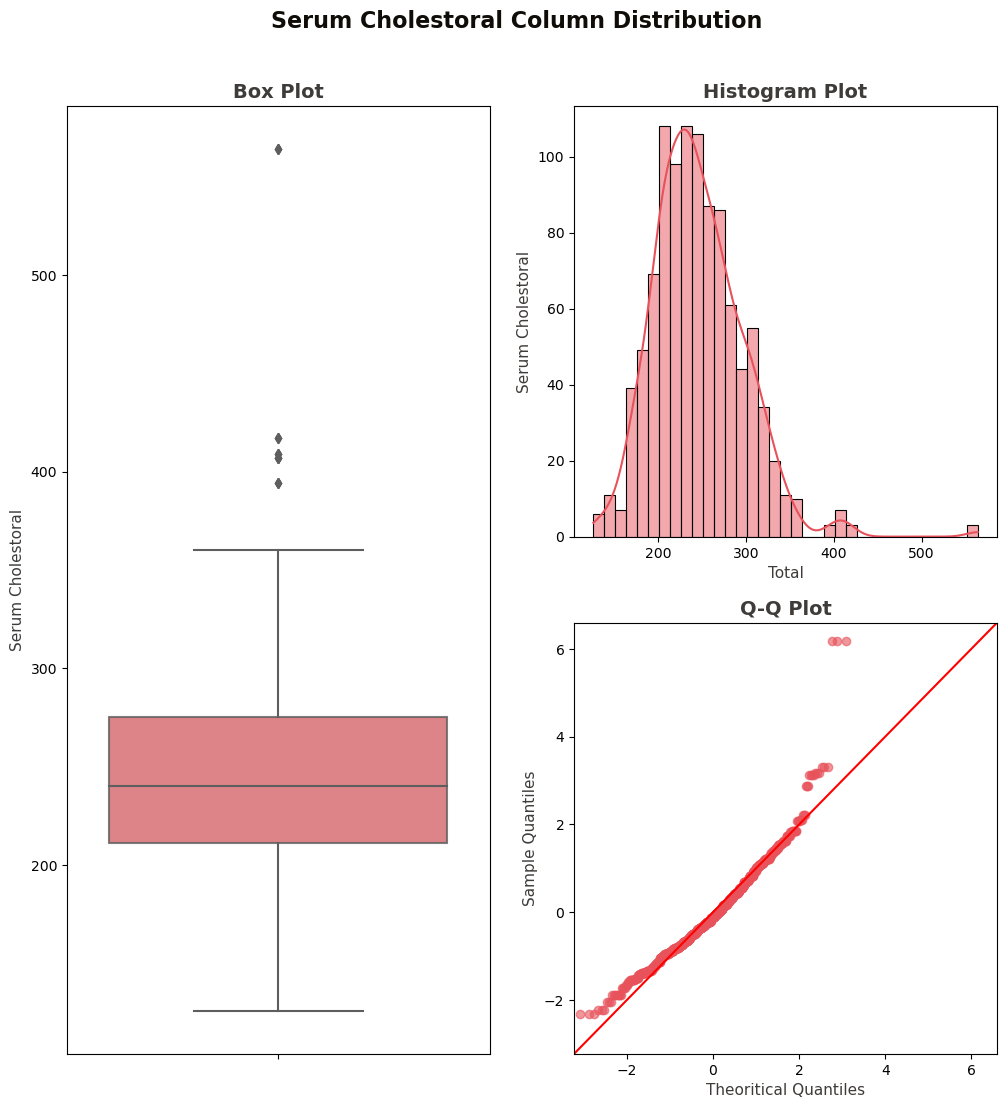

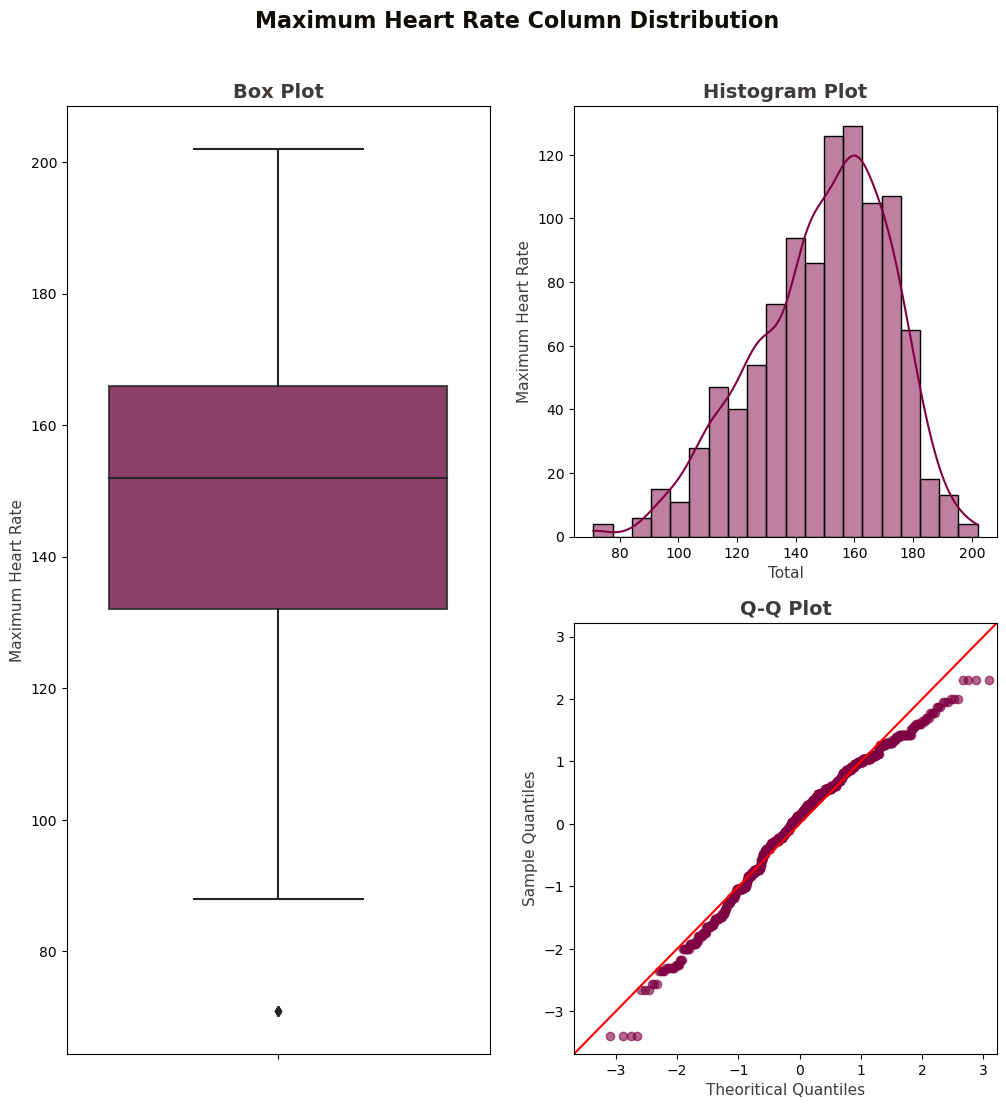

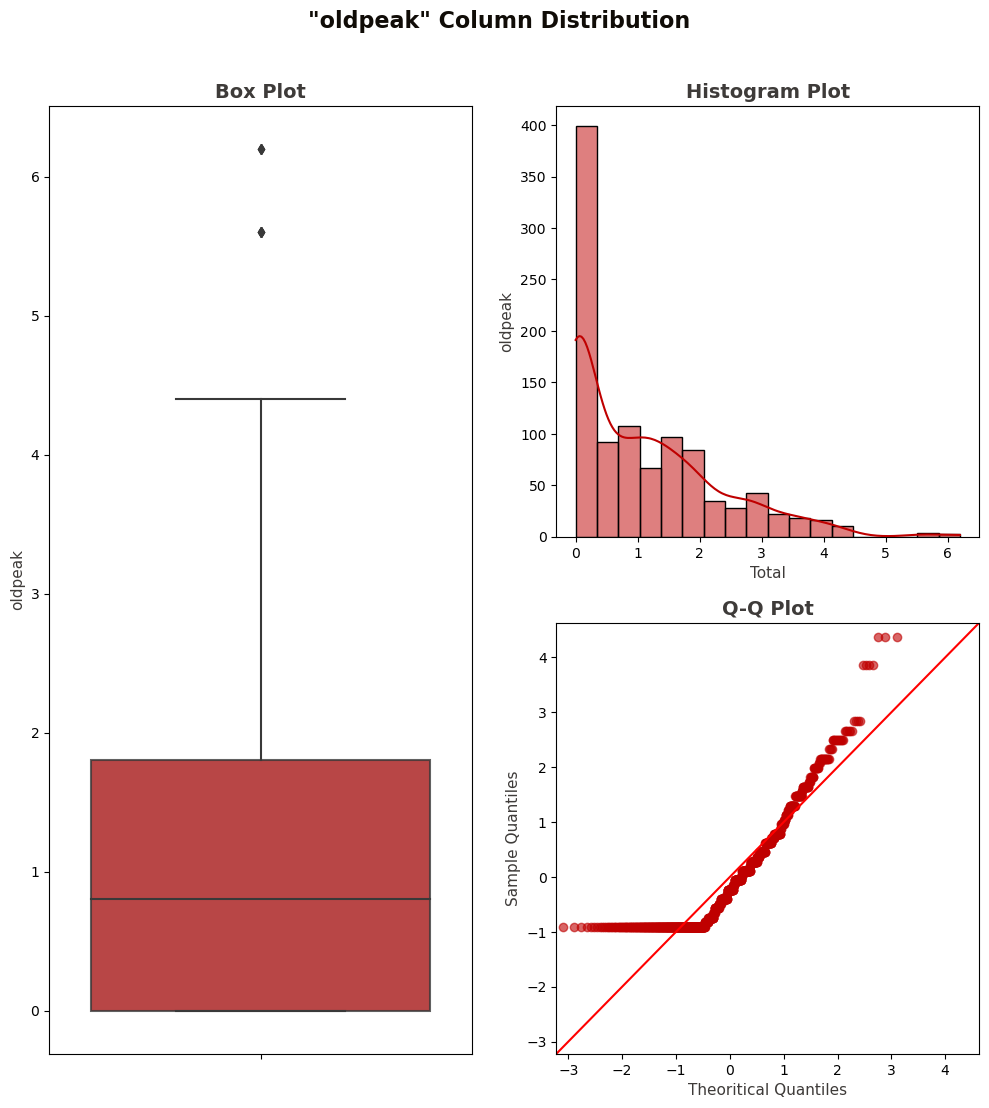

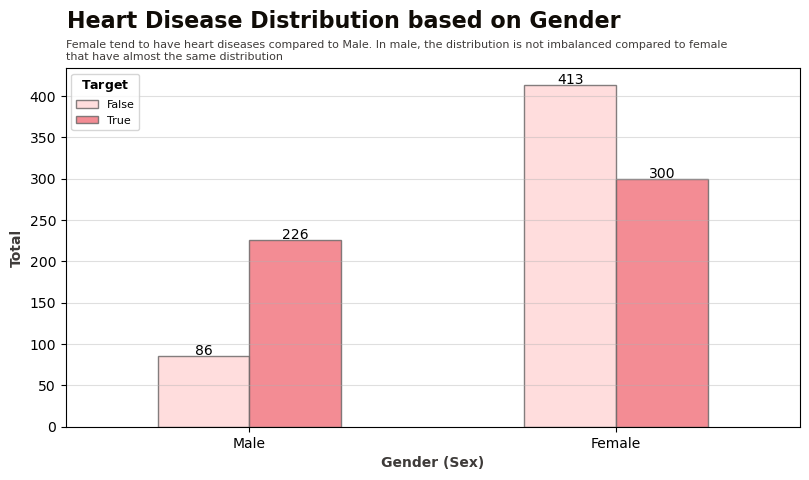

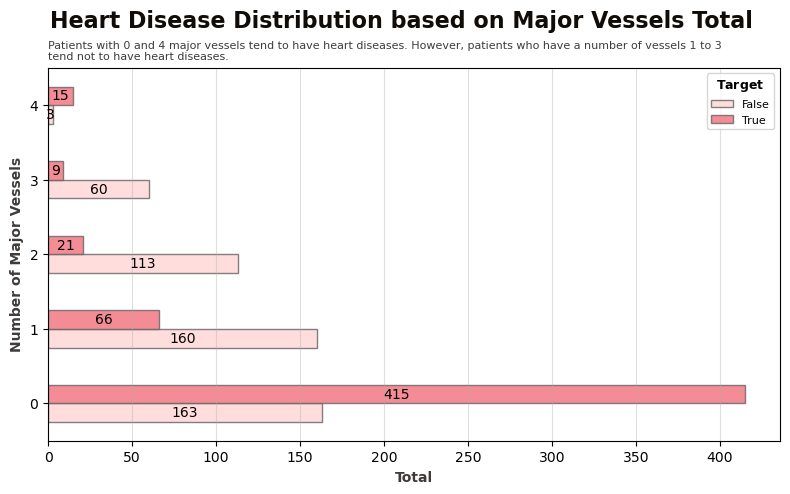

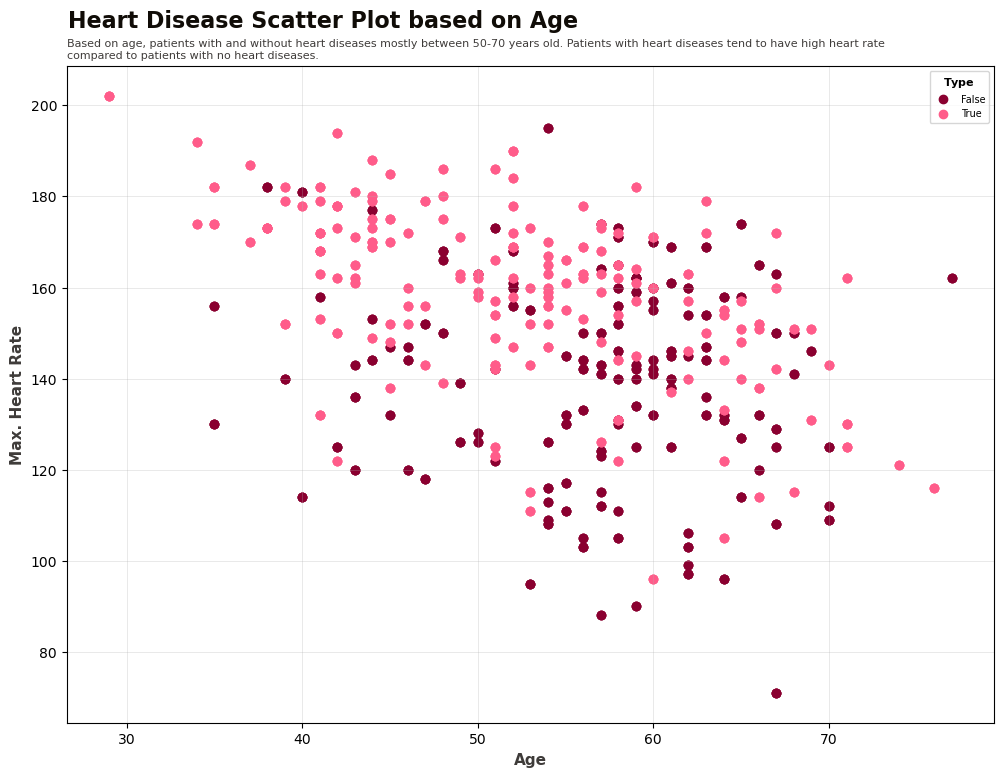

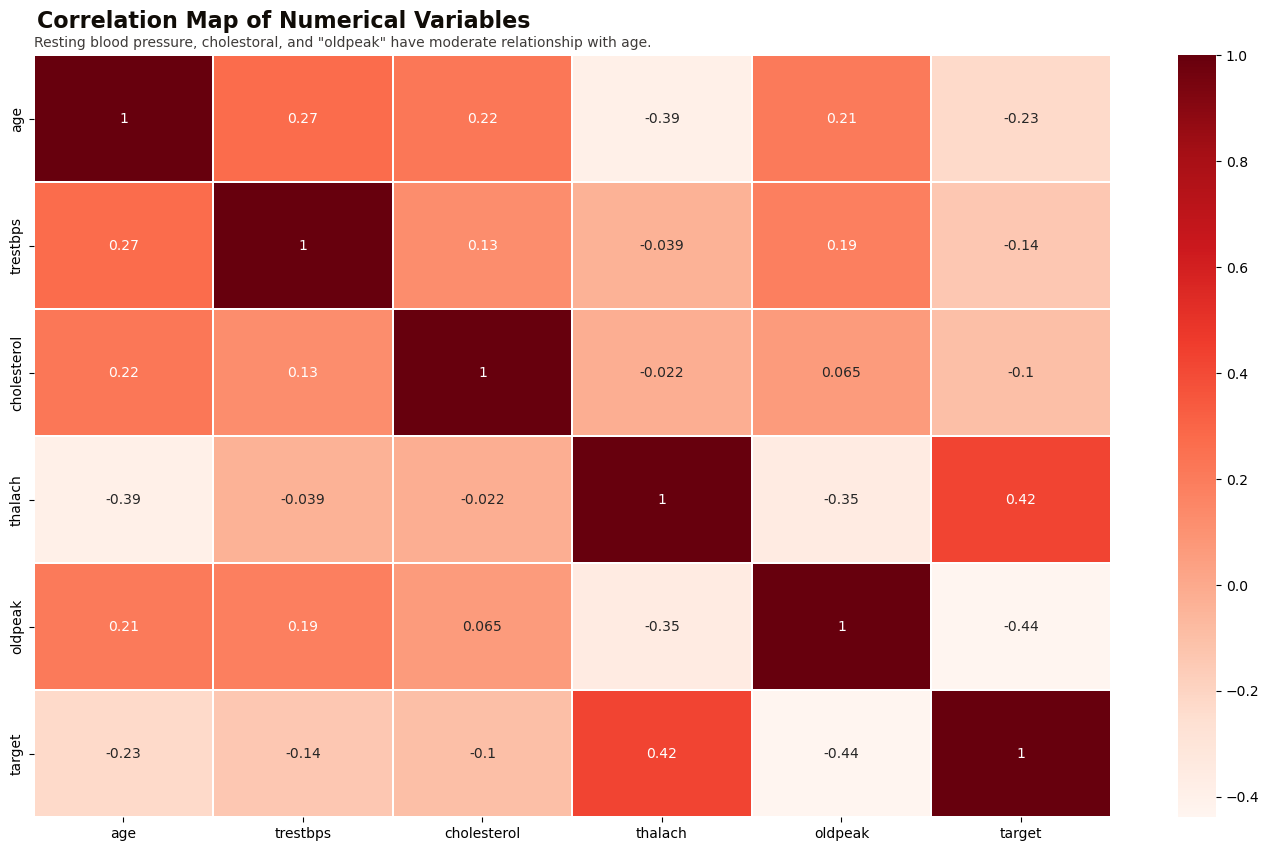

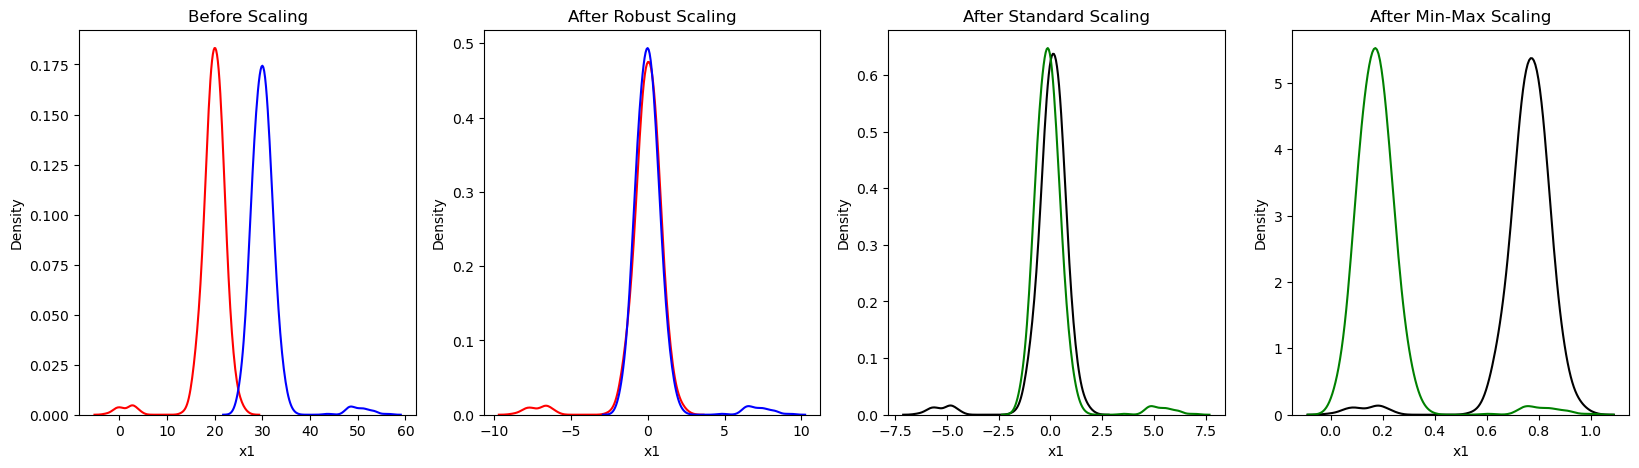

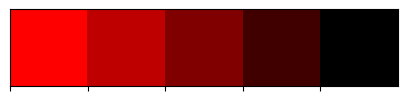

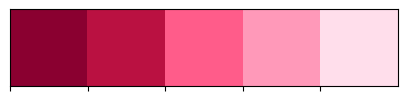

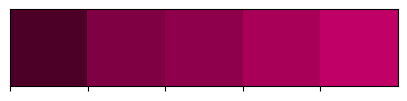

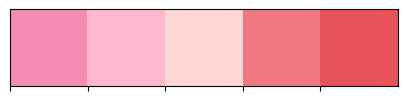

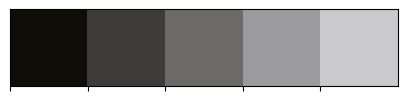

In [29]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

## Reading dataset

In [30]:
# --- Importing Dataset ---
df = pd.read_csv('heart1.csv')
data = df

# --- Reading Dataset ---
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

age,sex,chestpain,trestbps,cholesterol,fastbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0
53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0
70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0


In [31]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 1025
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1025 non-null   int64  
 1   sex          1025 non-null   int64  
 2   chestpain    1025 non-null   int64  
 3   trestbps     1025 non-null   int64  
 4   cholesterol  1025 non-null   int64  
 5   fastbs       1025 non-null   int64  
 6   restecg      1025 non-null   int64  
 7   thalach      1025 non-null   int64  
 8   exang        1025 non-null   int64  
 9   oldpeak      1025 non-null   float64
 10  slope        1025 non-null   int64  
 11  ca           1025 non-null   int64  
 12  thal         1025 non-null   int64  
 13  target       1025 non-null   int64  
dtypes: float64(1), int64(13)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 It can be seen that dataset has successfully imported.<br>
    👉 In the dataset, there are <mark><b>14 columns</b></mark> with <mark><b>303 observations</b></mark>. Also, there are <mark><b>no null values</b></mark> in this dataset. The <b>details of each variables</b> also can be seen above.<br>
    👉 However, the <mark><b>data types for some columns are not matched</b></mark>. Below will <mark><b>fixed the data types for those column</b></mark> before analysis performed.

In [32]:
# --- Fix Data Types ---
lst=['sex', 'chestpain', 'fastbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[lst] = df[lst].astype(object)

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Initial Data Exploration 🔍</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will focused on <b>initial data exploration</b> before applying ML models.

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  sex (Gender)</div>


*************************
.: Sex (Gender) Total :.
*************************


1    713
0    312
Name: sex, dtype: int64

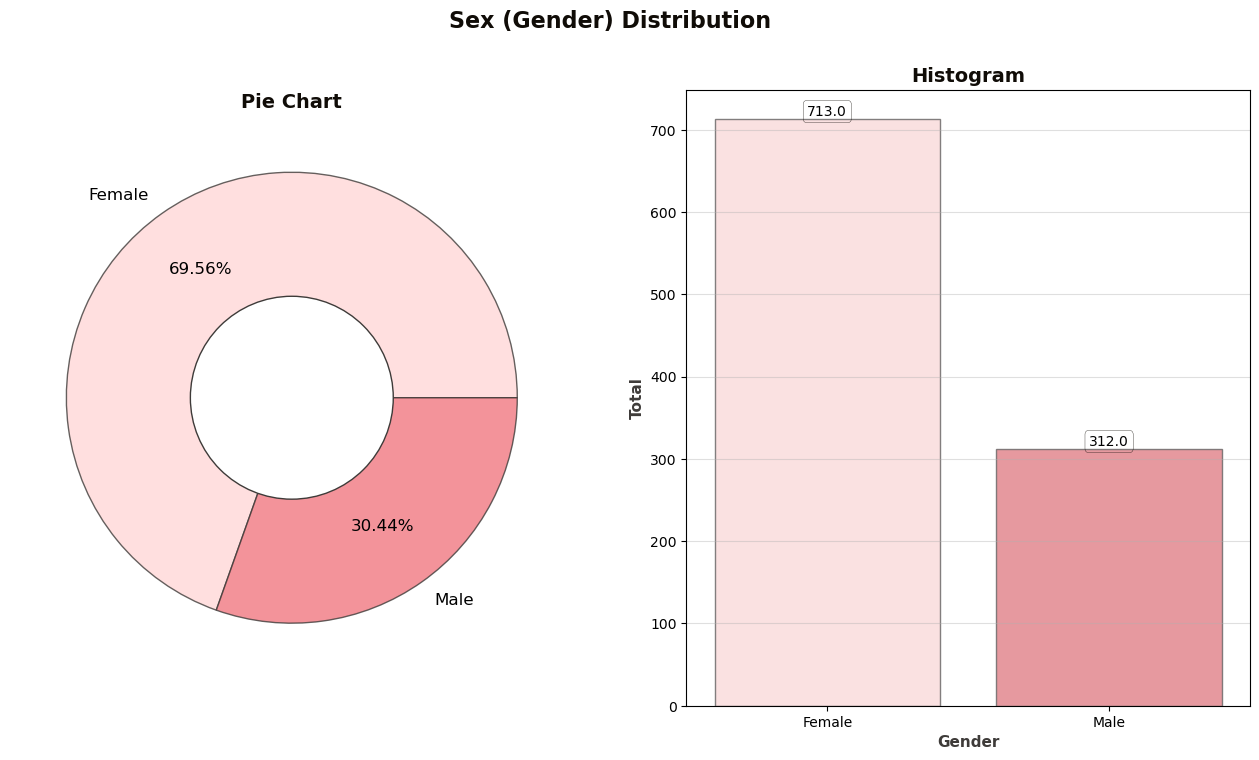

In [33]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:4]
labels=['Female', 'Male']
order=df['sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['sex'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='sex', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt
# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
df.sex.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  cp (Chest Pain Type)</div>

******************************
.: Chest Pain Type Total :.
******************************


0    497
2    284
1    167
3     77
Name: chestpain, dtype: int64

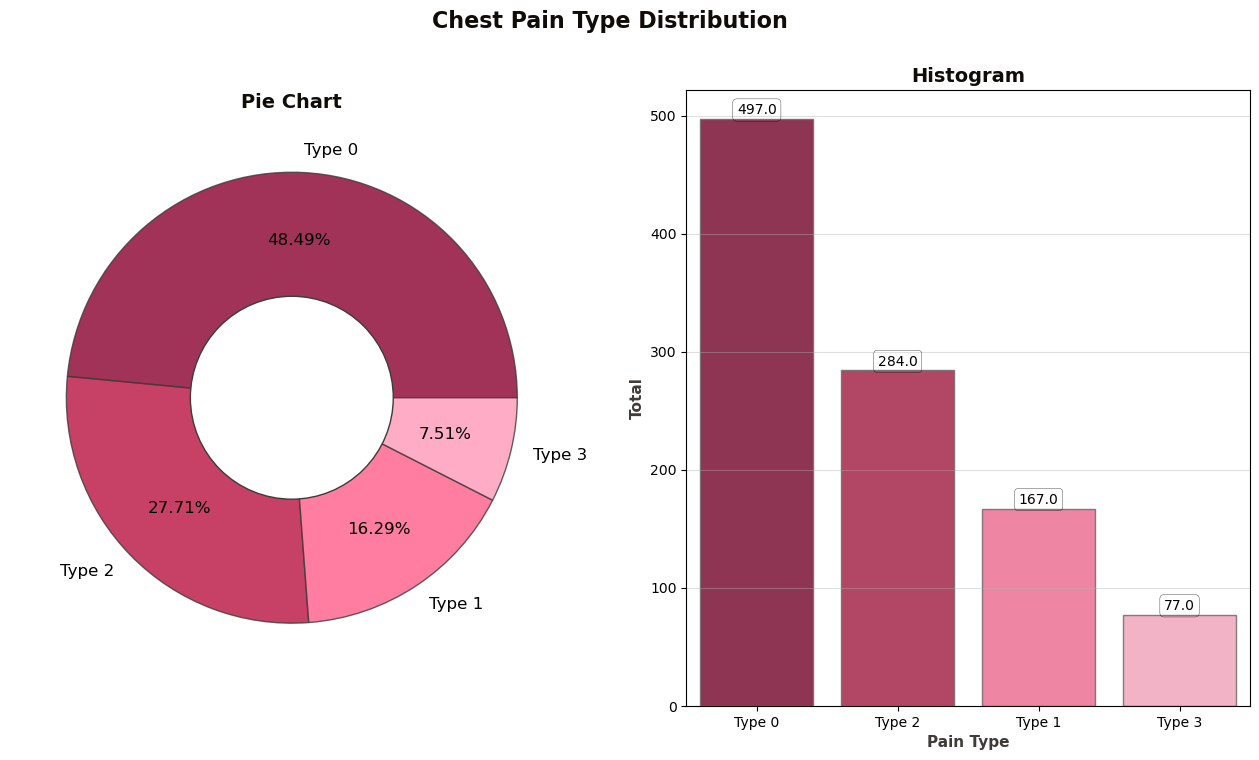

In [34]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[0:4]
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=df['chestpain'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['chestpain'].value_counts(), labels=labels, colors=colors, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]))
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='chestpain', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
df.chestpain.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> fbs (Fasting Blood Sugar)</div>

********************************
.: Fasting Blood Sugar Total :.
********************************


0    872
1    153
Name: fastbs, dtype: int64

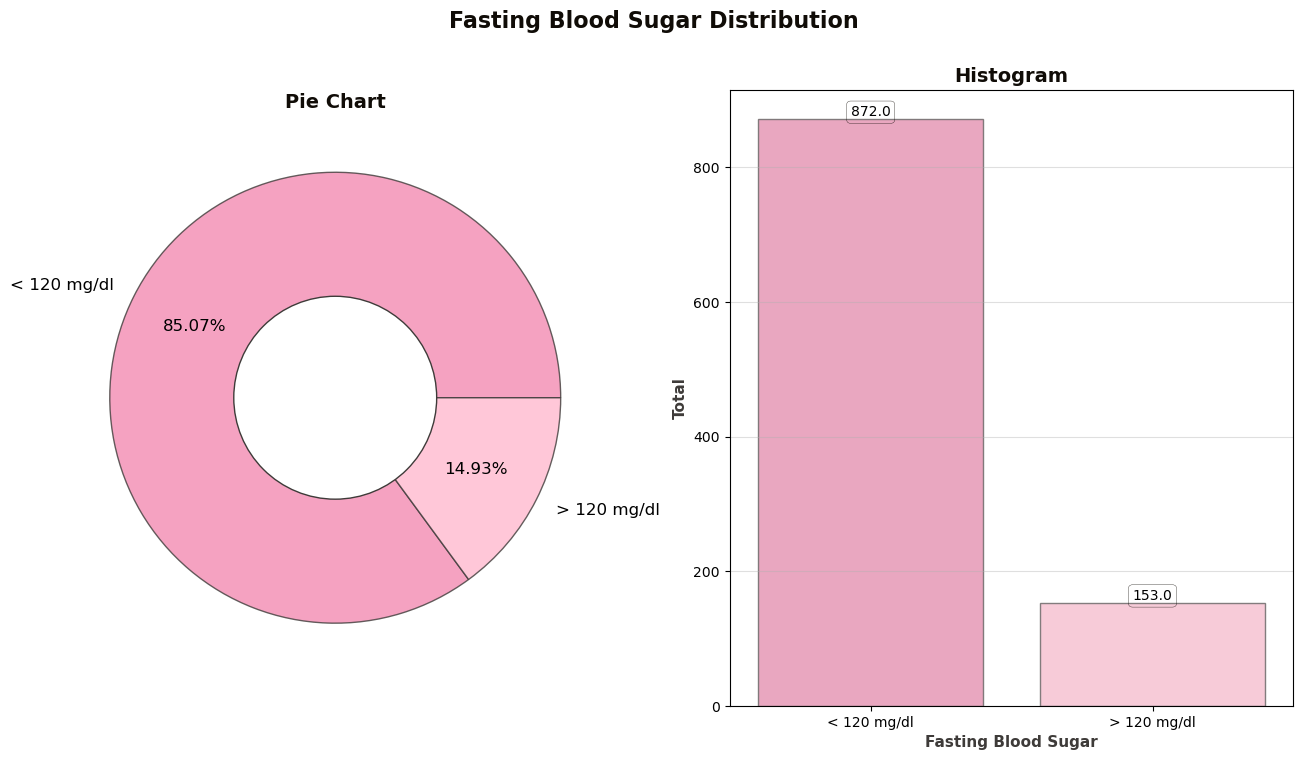

In [35]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[0:2]
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df['fastbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['fastbs'].value_counts(), labels=labels, colors=colors,
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='fastbs', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt


# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 32)
print('\033[1m'+'.: Fasting Blood Sugar Total :.'+'\033[0m')
print('*' * 32)
df.fastbs.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  restecg (Resting Electrocardiographic Results)</div>

**************************************************
.: Resting Electrocardiographic Results Total :.
**************************************************


1    513
0    497
2     15
Name: restecg, dtype: int64

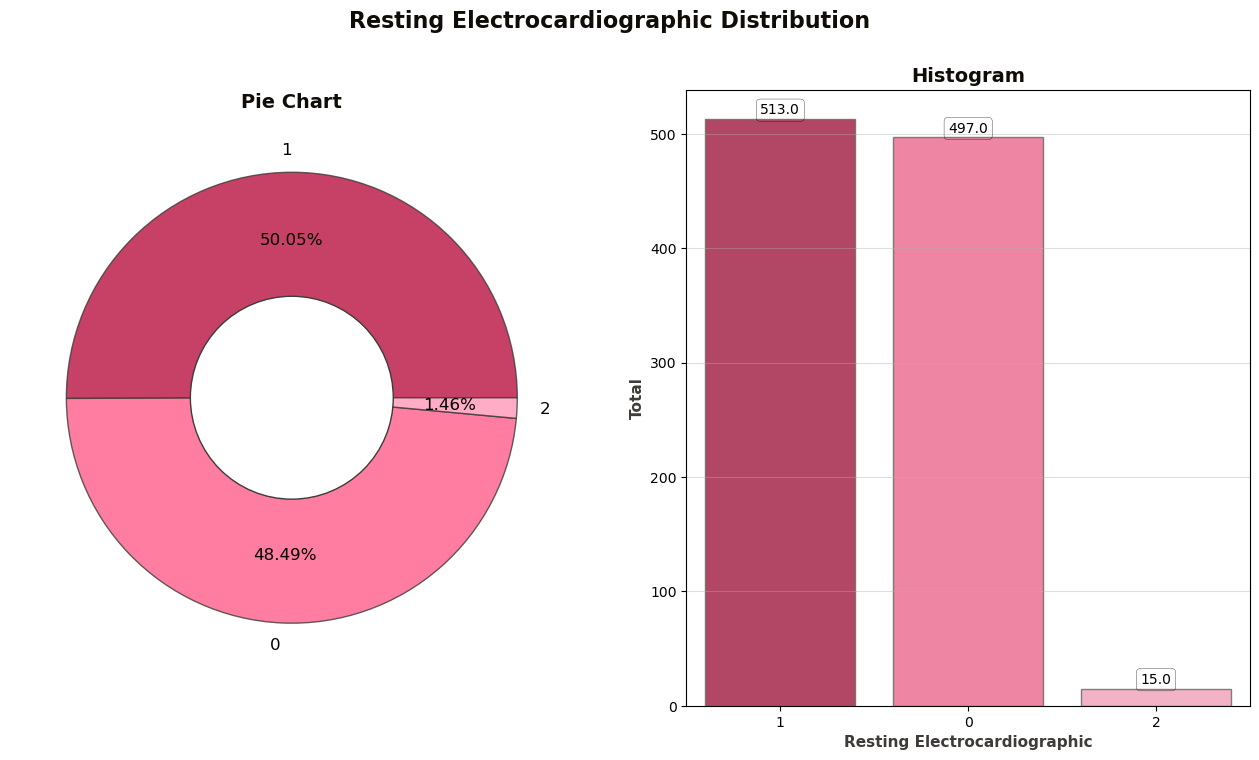

In [36]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[1:4]
labels=['1', '0', '2']
order=df['restecg'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['restecg'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='restecg', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 50)
print('\033[1m'+'.: Resting Electrocardiographic Results Total :.'+'\033[0m')
print('*' * 50)
df.restecg.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  exang (Exercise Induced Angina)</div>

***********************************
.: Exercise Induced Angina Total :.
***********************************


0    680
1    345
Name: exang, dtype: int64

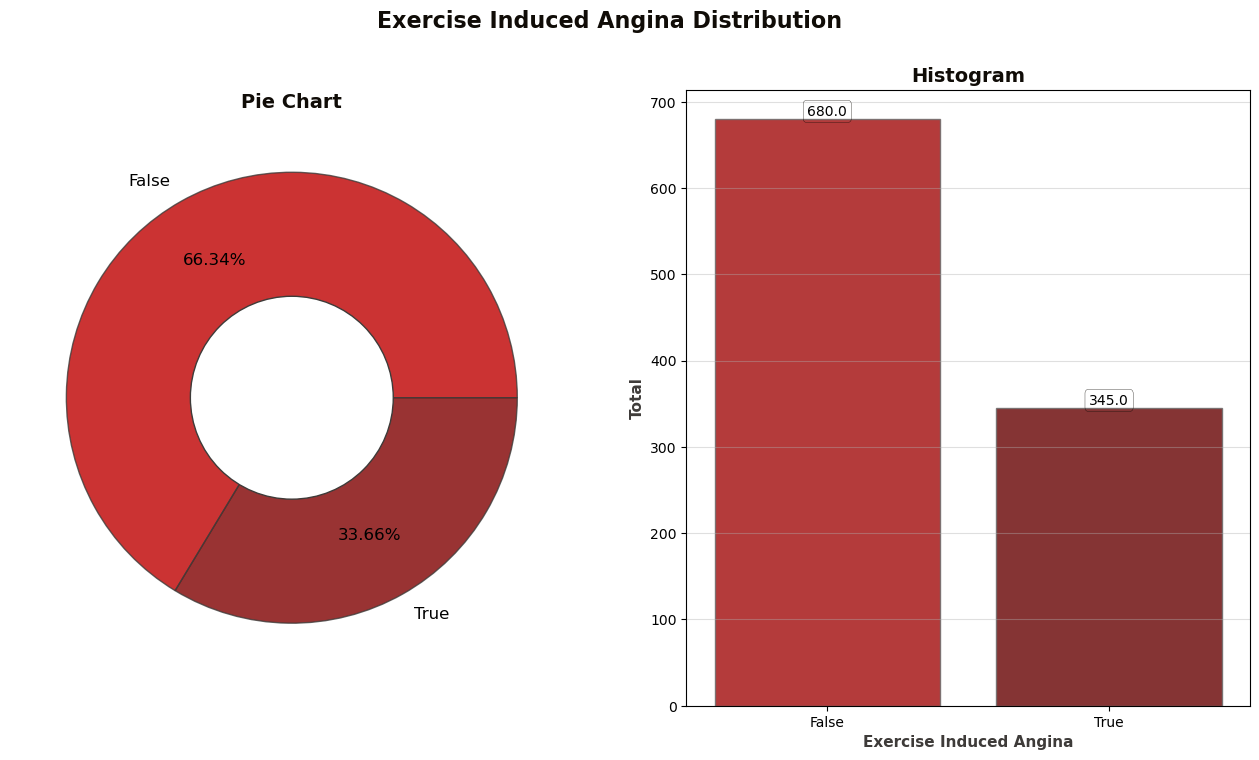

In [37]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[1:3]
labels=['False', 'True']
order=df['exang'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['exang'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='exang', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 35)
print('\033[1m'+'.: Exercise Induced Angina Total :.'+'\033[0m')
print('*' * 35)
df.exang.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  slope (Slope of the Peak Exercise)</div>

********************
.: Slope Total :.
********************


1    482
2    469
0     74
Name: slope, dtype: int64

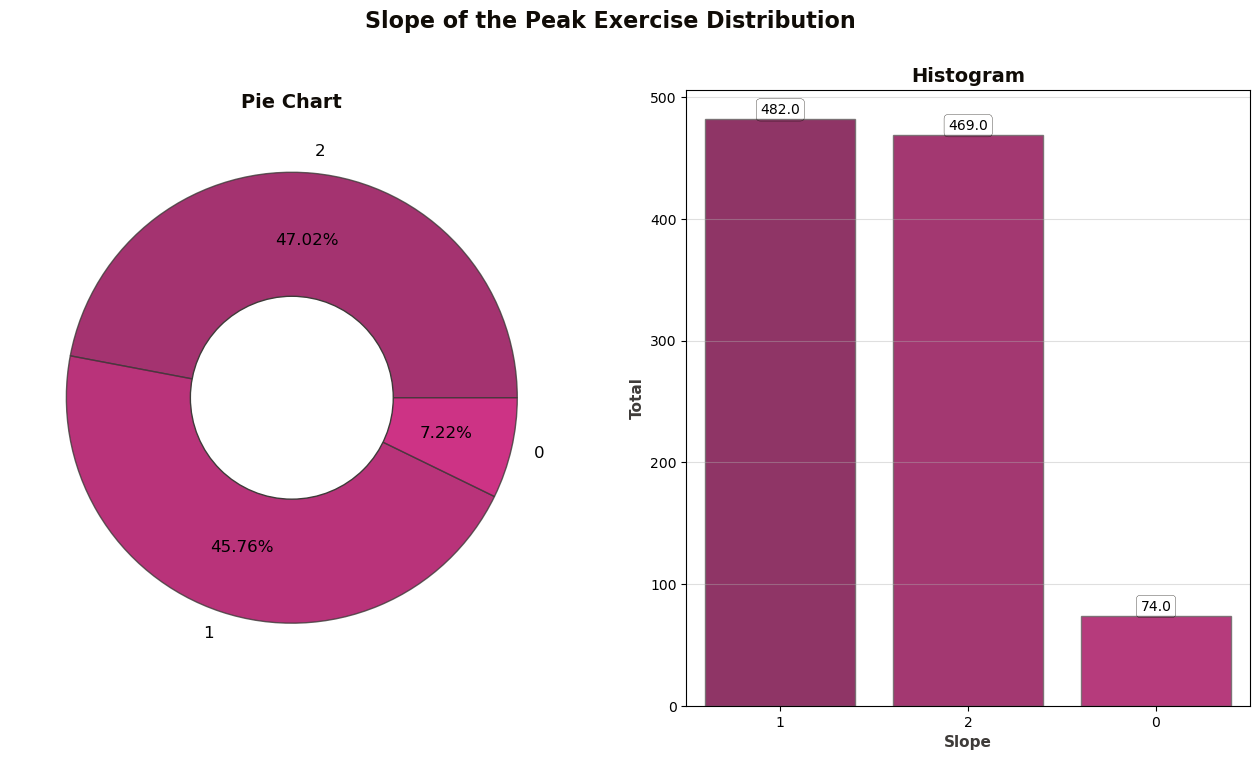

In [38]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad[2:5]
labels=['2', '1', '0']
order=df['slope'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['slope'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)


# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='slope', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Slope', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt
# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: Slope Total :.'+'\033[0m')
print('*' * 20)
df.slope.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  ca (Number of Major Vessels)</div>

****************************************
.: Number of Major Vessels Total :.
****************************************


0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

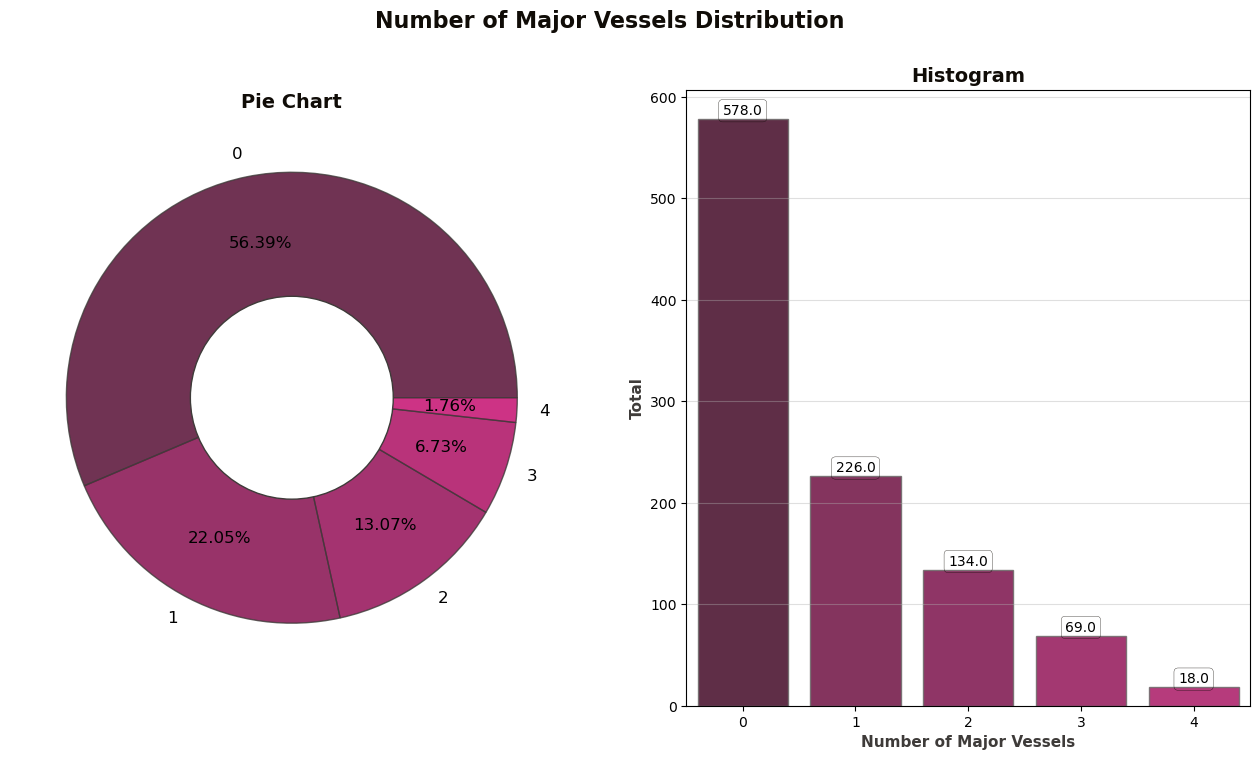

In [39]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad
labels=['0', '1', '2', '3', '4']
order=df['ca'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['ca'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='ca', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of Major Vessels', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 40)
print('\033[1m'+'.: Number of Major Vessels Total :.'+'\033[0m')
print('*' * 40)
df.ca.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> thal</div>

********************
.: "thal" Total :.
********************


2    544
3    410
1     64
0      7
Name: thal, dtype: int64

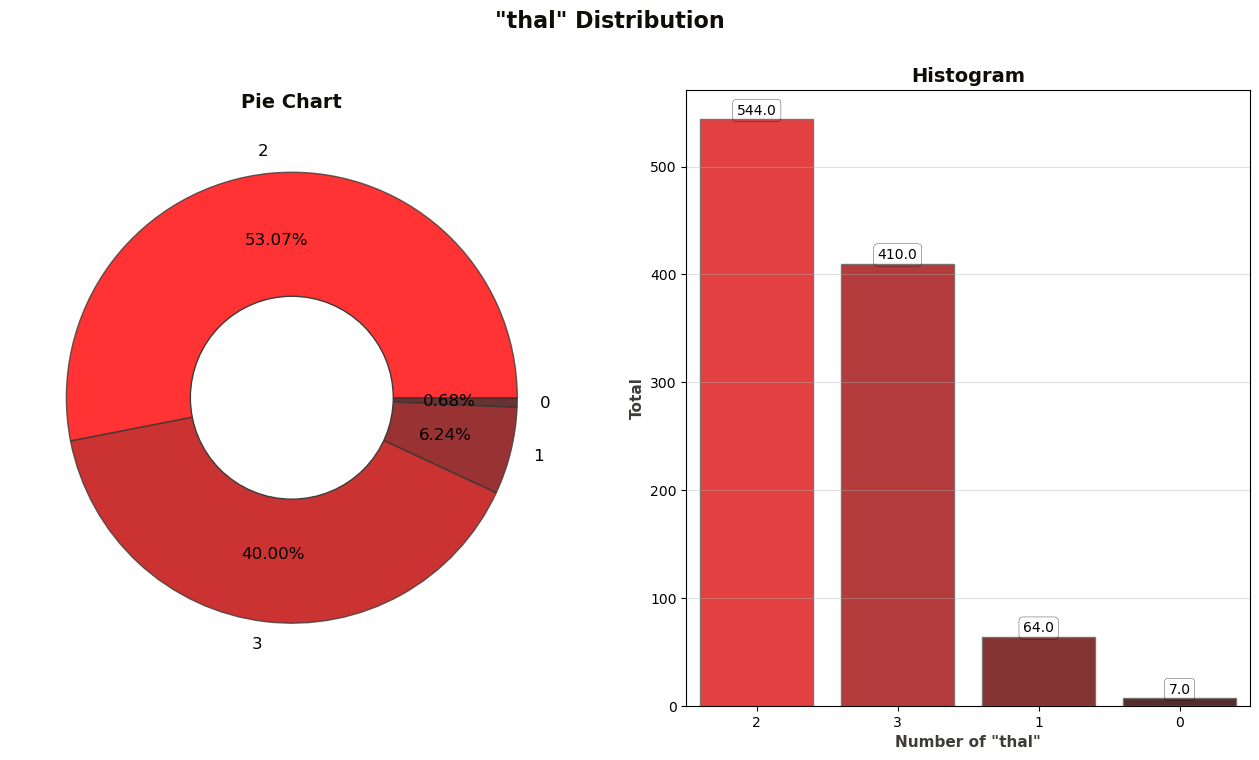

In [40]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[0:4]
labels=['2', '3', '1', '0']
order=df['thal'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('"thal" Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['thal'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='thal', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of "thal"', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: "thal" Total :.'+'\033[0m')
print('*' * 20)
df.thal.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> target (Heart Diseases Status)</div>

*********************************************
.: Heart Diseases Status (target) Total :.
*********************************************


1    526
0    499
Name: target, dtype: int64

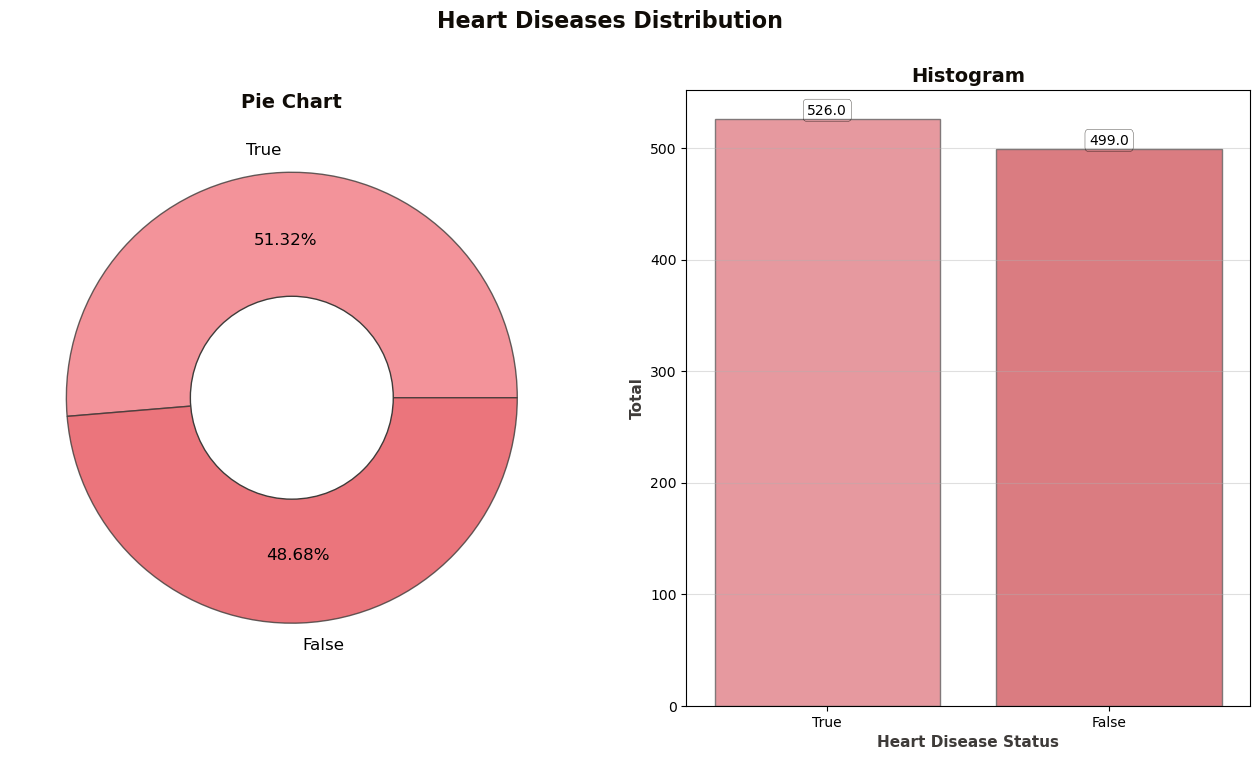

In [41]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[3:5]
labels=['True', 'False']
order=df['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['target'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='target', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Heart Disease Status', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 45)
print('\033[1m'+'.: Heart Diseases Status (target) Total :.'+'\033[0m')
print('*' * 45)
df.target.value_counts(dropna=False)

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Numerical Variable 🔢</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The second variable that will be explored is <b>numerical variable</b>.
</div>

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Descriptive Statistics 📏</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will show <b>descriptive statistics</b> of numerical variables.
</div>

In [42]:
# --- Descriptive Statistics ---
df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
age,1025.000000,54.434146,9.072290,29.000000,48.000000,56.000000,61.000000,77.000000
trestbps,1025.000000,131.611707,17.516718,94.000000,120.000000,130.000000,140.000000,200.000000
cholesterol,1025.000000,246.000000,51.592510,126.000000,211.000000,240.000000,275.000000,564.000000
thalach,1025.000000,149.114146,23.005724,71.000000,132.000000,152.000000,166.000000,202.000000
oldpeak,1025.000000,1.071512,1.175053,0.000000,0.000000,0.800000,1.800000,6.200000
target,1025.000000,0.513171,0.500070,0.000000,0.000000,1.000000,1.000000,1.000000


### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Continuous Column Distribution 📈</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will show the <b>distribution of numerical variables</b> in histograms, boxplots, Q-Q Plots, skewness and kurtosis values.
</div>

.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.249
Kurtosis: -0.526




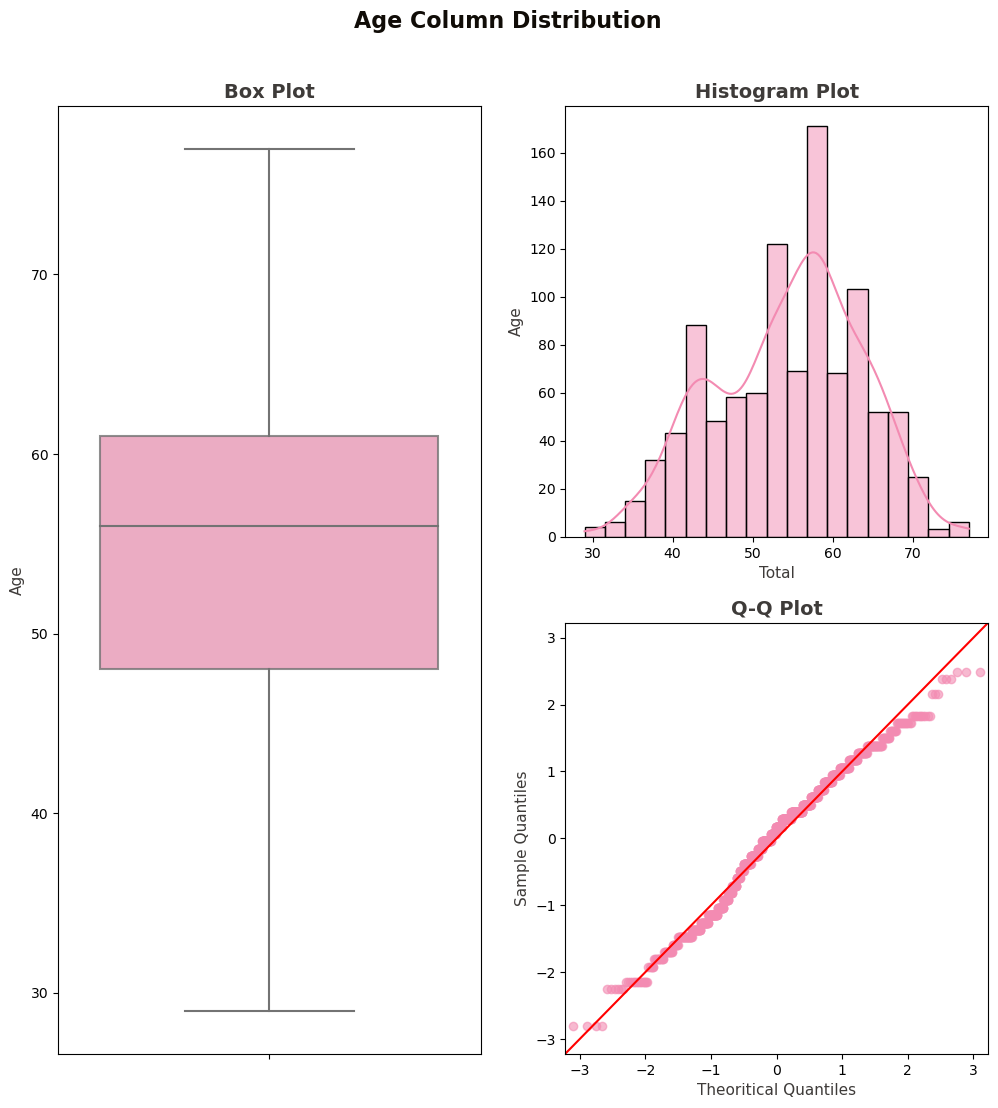

In [43]:
# --- Variable, Color & Plot Size ---
var = 'age'
color = color_mix[0]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;">  trestbps (Resting Blood Pressure in mm Hg) </h4>

.: Resting Blood Pressure Column Skewness & Kurtosis :.
*******************************************************
Skewness: 0.740
Kurtosis: 0.991




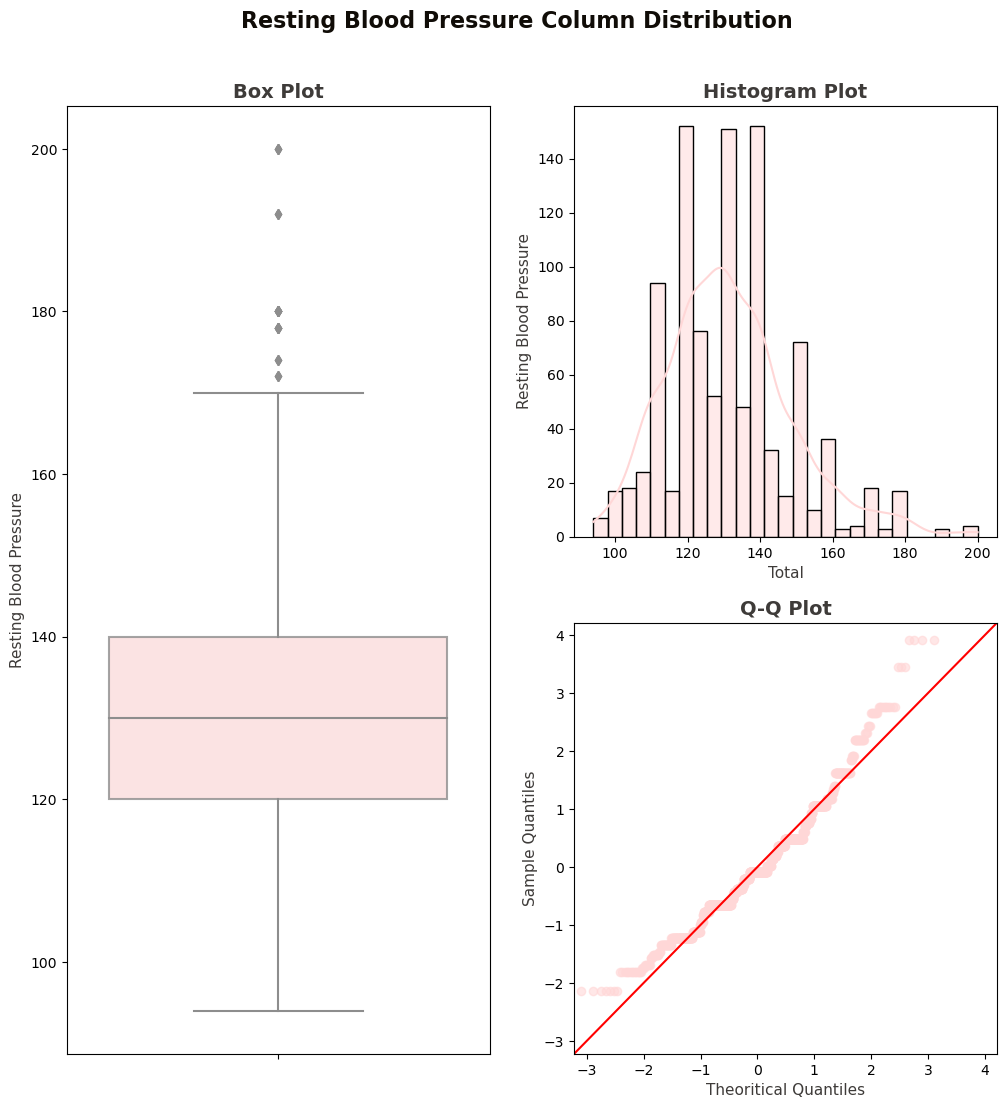

In [44]:
# --- Variable, Color & Plot Size ---
var = 'trestbps'
color = color_mix[2]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Resting Blood Pressure Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 55)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Resting Blood Pressure Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;">  chol (Serum Cholestoral in mg/dl) </h4>

.: Serum Cholestoral Column Skewness & Kurtosis :.
*********************************************
Skewness: 1.074
Kurtosis: 3.997




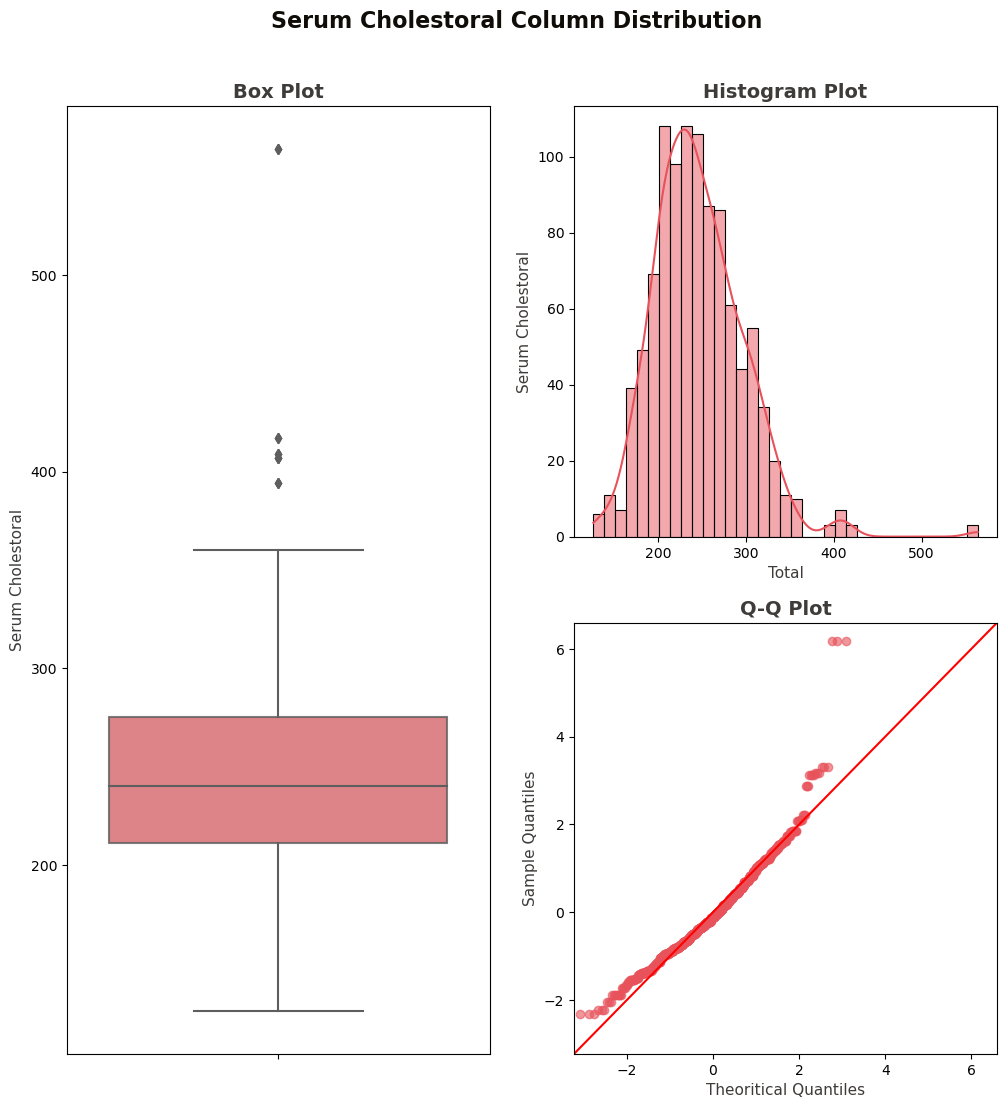

In [45]:
# --- Variable, Color & Plot Size ---
var = 'cholesterol'
color = color_mix[4]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Serum Cholestoral Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 45)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Serum Cholestoral Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])
# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;">  thalach (Maximum Heart Rate) </h4>

.: Maximum Heart Rate Column Skewness & Kurtosis :.
**************************************************
Skewness: -0.514
Kurtosis: -0.089




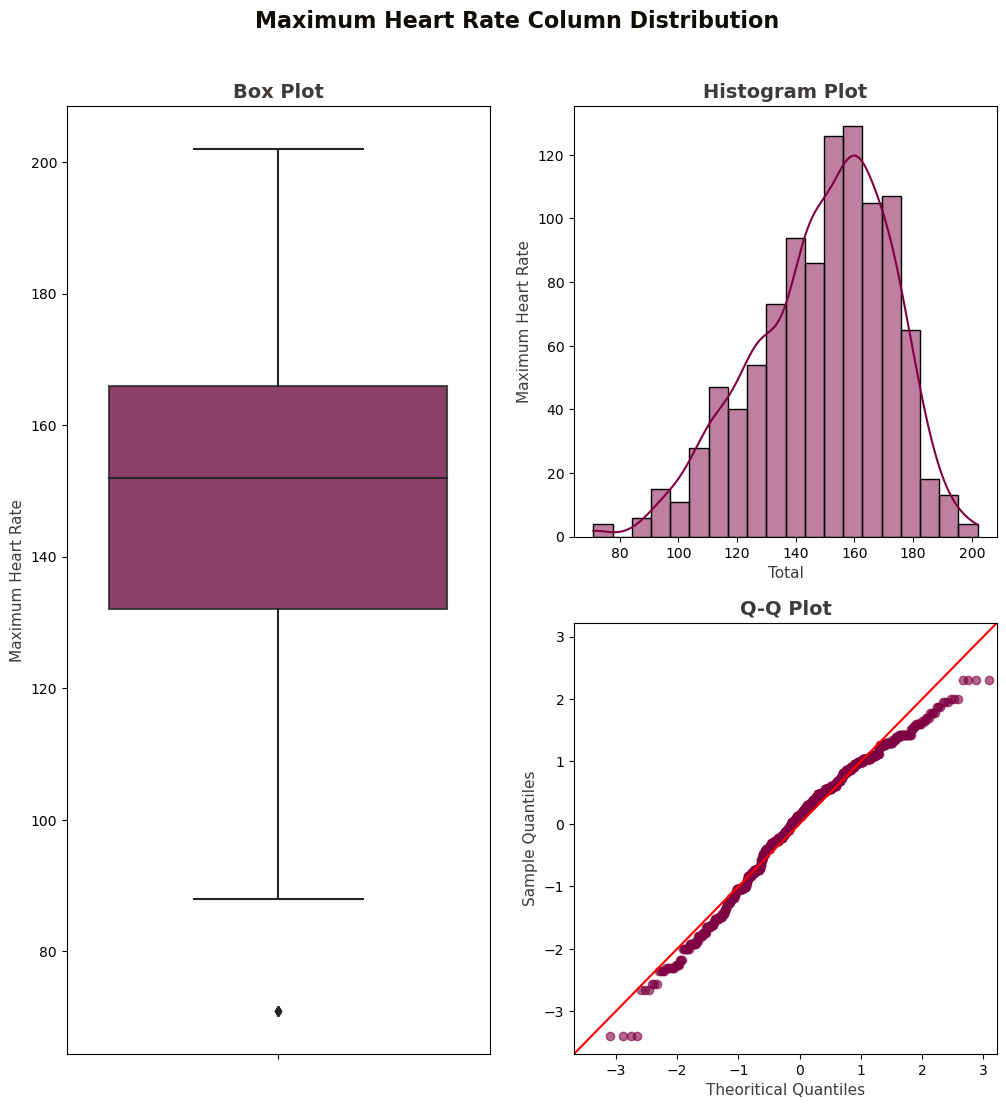

In [46]:
# --- Variable, Color & Plot Size ---
var = 'thalach'
color = purple_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Maximum Heart Rate Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 50)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Maximum Heart Rate Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;"> oldpeak </h4>

.: "oldpeak" Column Skewness & Kurtosis :.
****************************************
Skewness: 1.211
Kurtosis: 1.314




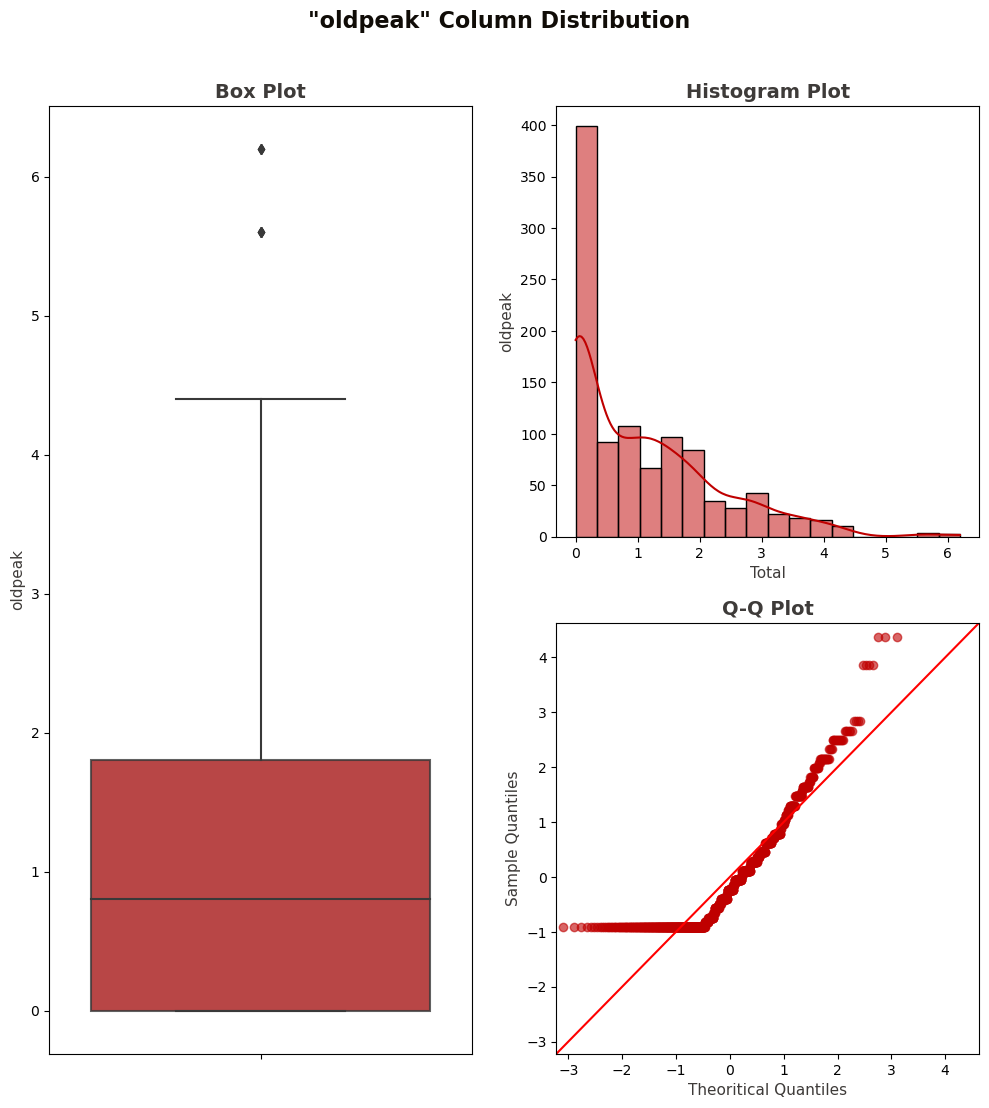

In [47]:
# --- Variable, Color & Plot Size ---
var = 'oldpeak'
color = red_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: "oldpeak" Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('"oldpeak" Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('oldpeak', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color,
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('oldpeak', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;"> EDA 📉</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will perform some <b>EDA</b> to get more insights about dataset.

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Heart Disease Distribution based on Gender 💉👫</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show heart disease distribution based on gender.
</div>

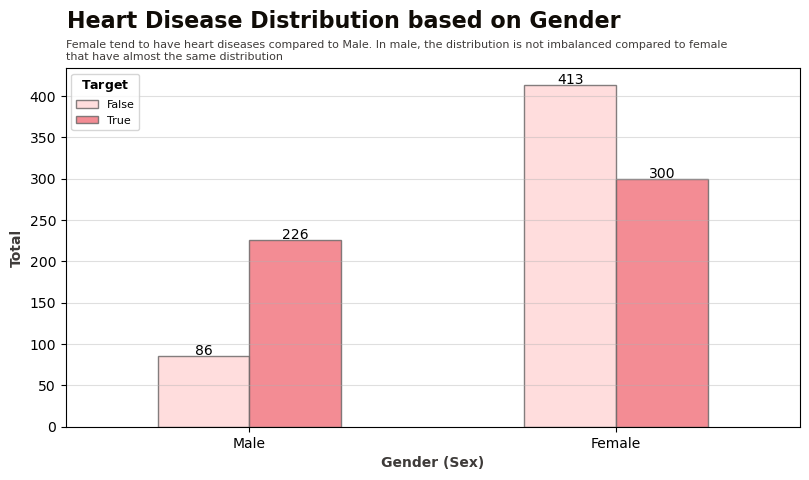

In [48]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(8, 5), 
                                         color=color_mix[2:4], 
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female\nthat have almost the same distribution', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">Heart Disease Distribution based on Major Vessels Total 💉💖</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show heart disease distribution based on number of major vessels.
</div>

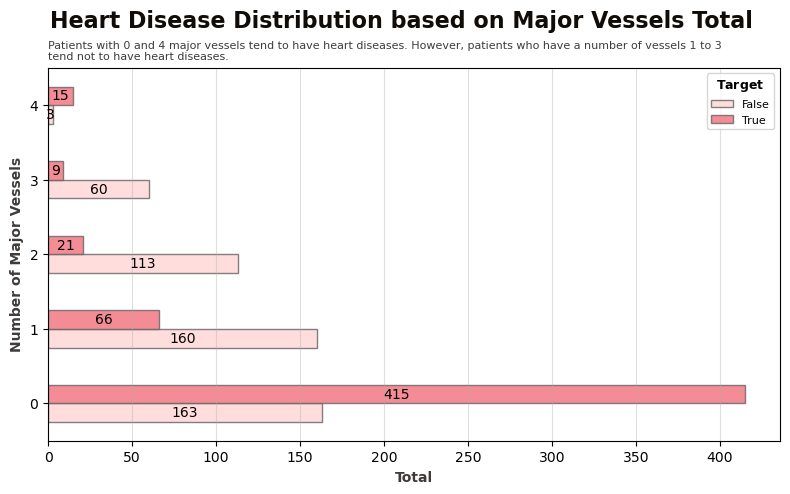

In [49]:
# --- Labels Settings ---
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(df.ca, df.target).plot(kind='barh', figsize=(8, 5), 
                                         color=color_mix[2:4],
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Heart Disease Scatter Plot based on Age 💉👴</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show <b>scatter plot</b> of patients with heart diseases based on age.
</div>

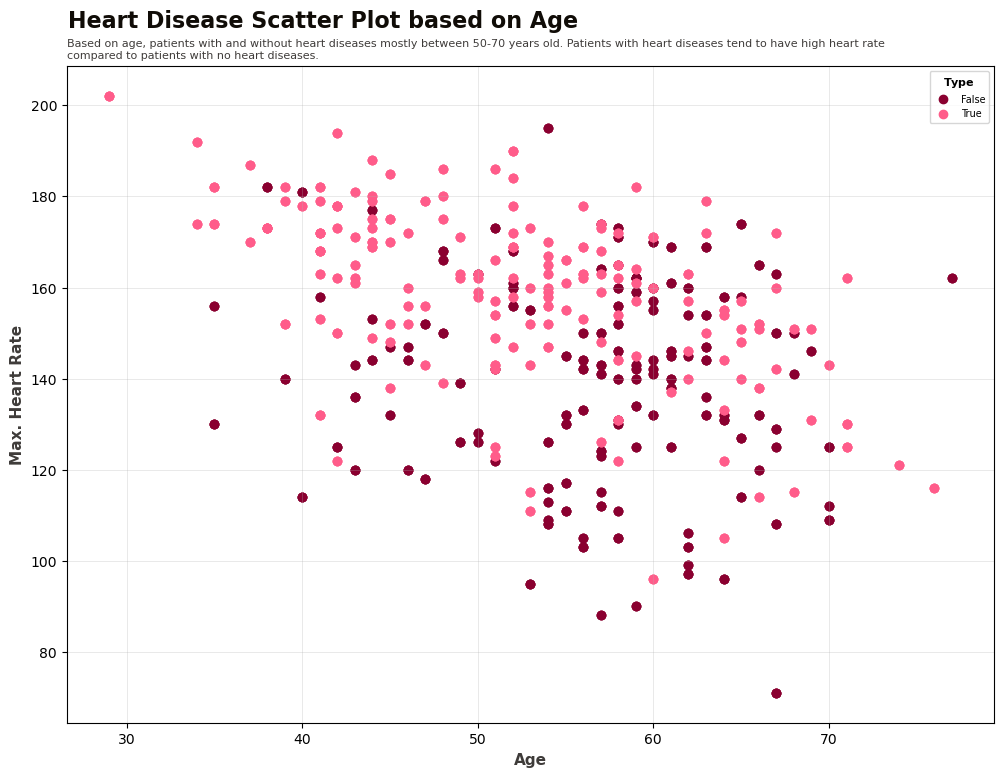

In [50]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c=pink_grad[0])
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c=pink_grad[2])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)
plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif', color=black_grad[1])
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Heatmap 🔥</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 Below is <b>correlation map/heatmap of numerical variables</b> to show correlation level/values for each variables with others.
</div>

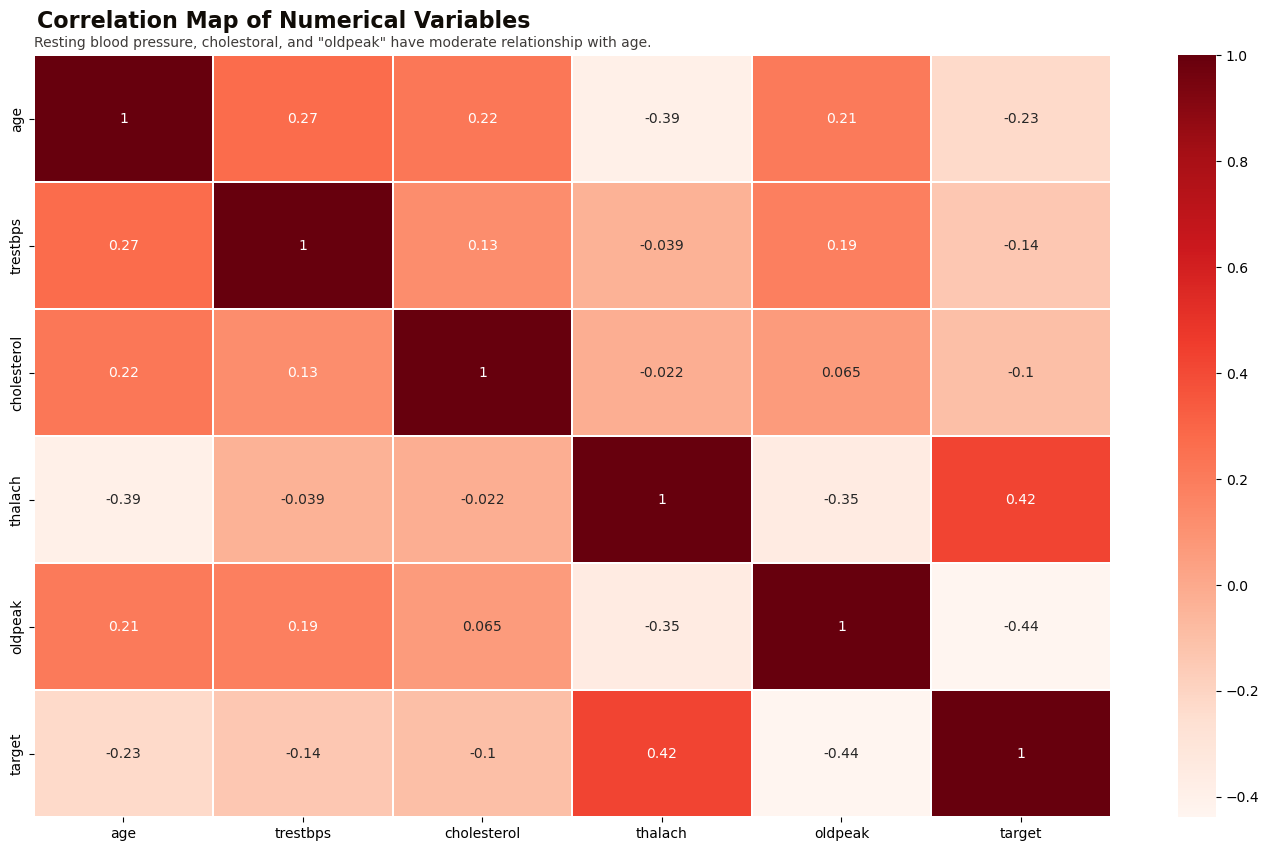

In [51]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

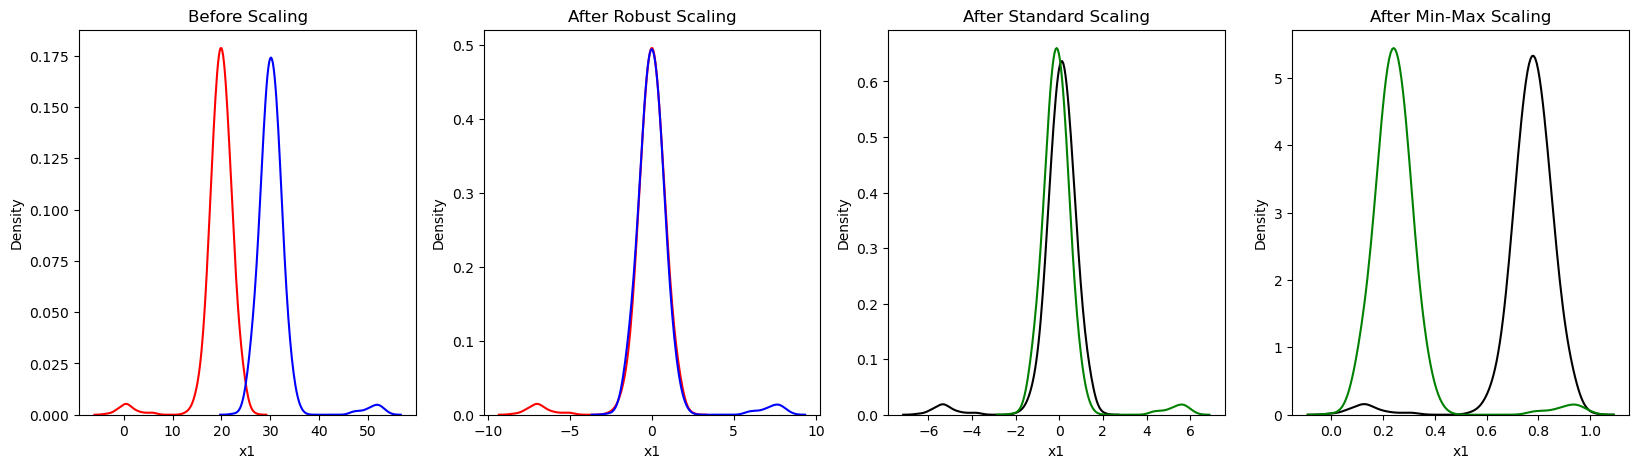

In [52]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

# Preprocessing

## Data imbalance check

In [53]:
labels=["Healthy","Heart Disease"]

healthy_or_not = df['target'].value_counts().tolist()
values = [healthy_or_not[0], healthy_or_not[1]]

fig = px.pie(values=df['target'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Healthy vs Heart Disease")
fig.show()

## Checking for outliers

In [54]:
numerical_columns = list(data.loc[:,['age', 'sex', 'chestpain', 'trestbps', 'cholesterol', 'fastbs',
       'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']])


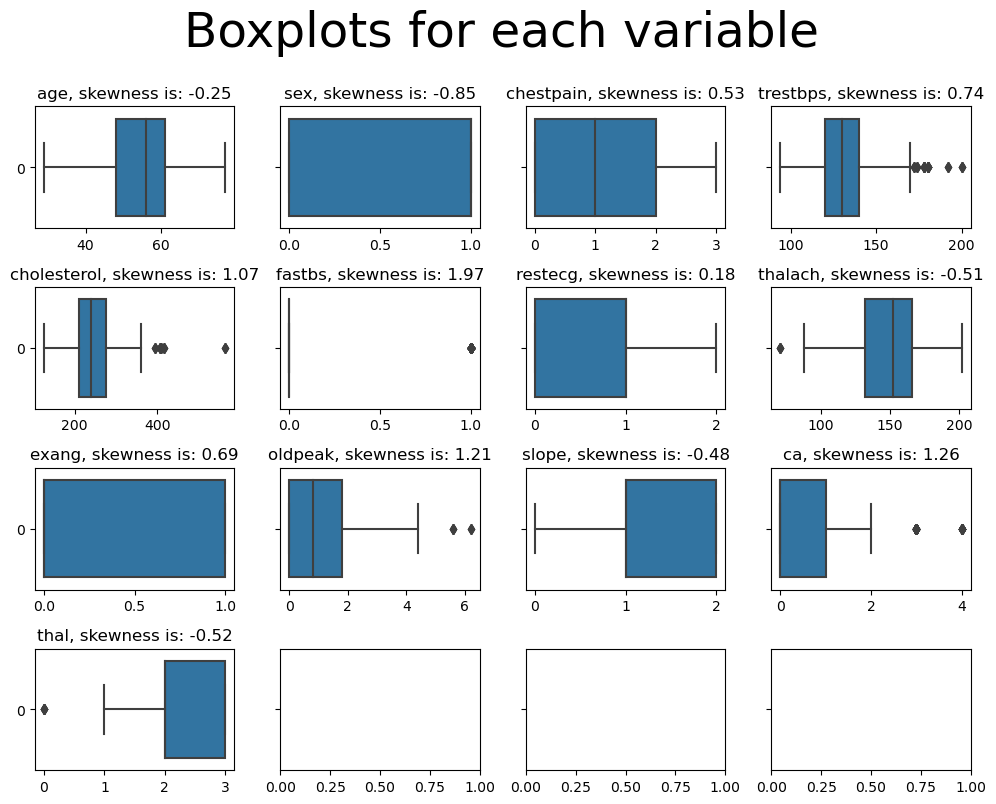

In [55]:
# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(10,8))
    fig.suptitle(suptitle,y=1, size=35)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=df, columns_list=numerical_columns, rows=4, cols=4, suptitle='Boxplots for each variable')
plt.tight_layout()

## Outlier analysis


In [56]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [57]:
data

,age,sex,chestpain,trestbps,cholesterol,fastbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Drop outliers

In [58]:
# #Uncomment to drop outliers 

# # detecting outliers
# Outliers_IQR = IQR_method(data,1,numerical_columns)

# # dropping outliers
# df = data.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1025 non-null   int64  
 1   sex          1025 non-null   object 
 2   chestpain    1025 non-null   object 
 3   trestbps     1025 non-null   int64  
 4   cholesterol  1025 non-null   int64  
 5   fastbs       1025 non-null   object 
 6   restecg      1025 non-null   object 
 7   thalach      1025 non-null   int64  
 8   exang        1025 non-null   object 
 9   oldpeak      1025 non-null   float64
 10  slope        1025 non-null   object 
 11  ca           1025 non-null   object 
 12  thal         1025 non-null   object 
 13  target       1025 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 112.2+ KB


## Feature Scaling - StandardScaler

In [60]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [61]:
col_names = numerical_columns
df = Standard_Scaler (df, col_names)
# df_OutFeat = Standard_Scaler (df_OutFeat, col_names)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## Test - Dropping unwanted features

In [63]:
df = df.drop(['fastbs'],axis = 1)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1025 non-null   float64
 1   sex          1025 non-null   float64
 2   chestpain    1025 non-null   float64
 3   trestbps     1025 non-null   float64
 4   cholesterol  1025 non-null   float64
 5   restecg      1025 non-null   float64
 6   thalach      1025 non-null   float64
 7   exang        1025 non-null   float64
 8   oldpeak      1025 non-null   float64
 9   slope        1025 non-null   float64
 10  ca           1025 non-null   float64
 11  thal         1025 non-null   float64
 12  target       1025 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 104.2 KB


In [65]:
df

,age,sex,chestpain,trestbps,cholesterol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852,0
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852,0
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852,0
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852,0
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,-0.484803,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122,1
1021,0.613800,0.661504,-0.915755,-0.377636,0.232705,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852,0
1022,-0.819834,0.661504,-0.915755,-1.234378,0.562371,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122,0
1023,-0.488996,-1.511706,-0.915755,-1.234378,0.155137,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122,1


## Split into Training and Testing data

In [66]:
X = df.drop(['target'],axis = 1)
y = df['target']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7,random_state=100)

# Model Formulation
Since we are dealing with multi-class classification problem, we will be using several machine learning algorithms:

1. Linear regression
2. Linear regression with HT
3. Decision Tree
4. Decision Tree with HT
5. Logistic regression
6. Logistic regression with HT

We will record all the experiment in the dictionary below. `[model, accuracy, time]`

In [68]:
models = {
    "sklearn": [],
    "tf": []
}

## Linear Regression Model

In [69]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

#append to models
models["sklearn"].append((model, accuracy))

Accuracy: 0.5315103683479976


## Hyperparameter Tuning 

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Create the Linear Regression model
model = LinearRegression()

# Define the hyperparameters to tune
hyperparameters = {
    'fit_intercept': [True, False]
}

# Perform grid search to find the best hyperparameters
grid = GridSearchCV(model, hyperparameters, cv=5)
grid.fit(X_train, y_train)

# Get the best model with tuned hyperparameters
best_model = grid.best_estimator_

# Use the best model for predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = best_model.score(X_test, y_test)
print('Accuracy:', accuracy)

#append to models
models["sklearn"].append((model, accuracy))

Accuracy: 0.5315103683479976


## Decision Tree Model

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Create the decision tree classifier object
dtc = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred_dtc)

# Printing the accuracy
print("Accuracy:", accuracy)

#append to models
models["sklearn"].append((dtc, accuracy))

Accuracy: 1.0


## Hyperparameter Tuning

In [72]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the decision tree classifier object
dtc = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

#append to models
models["sklearn"].append((dtc, accuracy))

Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9707792207792207


## Logistic Regression Model

In [73]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

#append to models
models["sklearn"].append((model, accuracy))

Accuracy: 0.8668831168831169


## Hyperparameter Tuning

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore the convergence warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define the hyperparameters to tune
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

# Create and train the logistic regression model
model = LogisticRegression(max_iter=2000)
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

#append to models
models["sklearn"].append((model, accuracy))

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Accuracy: 0.8733766233766234


## Export to csv (will be removed)

In [75]:
# df_Feat.to_csv(r'dataFeat.csv', index=False)
# df_OutFeat.to_csv(r'dataOutFeat.csv', index=False)

# Model Evaluation

In [76]:
model_list = [(model, acc) for k in models.keys()
              for (model, acc) in models[k]]
model_df = pd.DataFrame(model_list, columns=["model", "accuracy"])
model_df

,model,accuracy
0,LinearRegression(),0.531510
1,LinearRegression(),0.531510
2,DecisionTreeClassifier(random_state=42),1.000000
3,DecisionTreeClassifier(random_state=42),0.970779
4,LogisticRegression(max_iter=1000),0.866883
5,LogisticRegression(max_iter=2000),0.873377


In [77]:
model_df.sort_values("accuracy", ascending=False)

,model,accuracy
2,DecisionTreeClassifier(random_state=42),1.000000
3,DecisionTreeClassifier(random_state=42),0.970779
5,LogisticRegression(max_iter=2000),0.873377
4,LogisticRegression(max_iter=1000),0.866883
0,LinearRegression(),0.531510
1,LinearRegression(),0.531510


## Skip to here for building model 👇
- [Preprocessing](#Preprocessing)
    - [Drop outliers](#Drop-outliers)
    - [Feature Scaling - StandardScaler](#Feature-Scaling---StandardScaler)
- [Split into Training and Testing data](#Split-into-Training-and-Testing-data)
- [Model Formulation](#Model-Formulation)
- [Export to csv (will be removed)](#Export-to-csv-(will-be-removed))
- [Model Evaluation](#Model-Evaluation)

[Test - Dropping unwanted features](#Test---Dropping-unwanted-features)